In [365]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import pylab
import scipy 
from scipy import stats 
import statsmodels.api as sm


from sklearn.decomposition import FactorAnalysis
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [366]:
df = pd.read_csv('/Users/demko/Downloads/rent_apartment_moscow.csv', sep=',')

In [367]:
## Выводим верх таблицы с данными

In [368]:
df.head()

,Unnamed: 0,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,total_area,living_area,kitchen_area
0,0,Baumanskaia,80000,13,walk,agency,50,127,5,8,2,50,30,6
1,1,Kommunarka,27000,3,transport,owner,0,23,12,15,1,38,17,12
2,2,Michurinskii prospekt,150000,5,walk,realtor,0,56,17,24,4,130,70,15
3,3,Khovrino,47000,10,walk,realtor,50,748,6,17,2,55,32,9
4,4,Planernaia,39000,10,walk,realtor,50,835,8,9,1,33,18,7


In [369]:
## Делаем первые буквы в названиях столбцов заглавными

In [370]:
df.columns = df.columns.str.title()
df.head()

,Unnamed: 0,Metro,Price,Minutes,Way,Provider,Fee_Percent,Views,Storey,Storeys,Rooms,Total_Area,Living_Area,Kitchen_Area
0,0,Baumanskaia,80000,13,walk,agency,50,127,5,8,2,50,30,6
1,1,Kommunarka,27000,3,transport,owner,0,23,12,15,1,38,17,12
2,2,Michurinskii prospekt,150000,5,walk,realtor,0,56,17,24,4,130,70,15
3,3,Khovrino,47000,10,walk,realtor,50,748,6,17,2,55,32,9
4,4,Planernaia,39000,10,walk,realtor,50,835,8,9,1,33,18,7


In [371]:
## Добавим первый столбец с нумерацией строк

In [372]:
df['№'] = df.index + 1
df = df[['№'] + [col for col in df.columns if col != '№']]
df.head()

,№,Unnamed: 0,Metro,Price,Minutes,Way,Provider,Fee_Percent,Views,Storey,Storeys,Rooms,Total_Area,Living_Area,Kitchen_Area
0,1,0,Baumanskaia,80000,13,walk,agency,50,127,5,8,2,50,30,6
1,2,1,Kommunarka,27000,3,transport,owner,0,23,12,15,1,38,17,12
2,3,2,Michurinskii prospekt,150000,5,walk,realtor,0,56,17,24,4,130,70,15
3,4,3,Khovrino,47000,10,walk,realtor,50,748,6,17,2,55,32,9
4,5,4,Planernaia,39000,10,walk,realtor,50,835,8,9,1,33,18,7


## Часть 1. Общий анализ таблицы

In [373]:
## Проверяем типы данных и смотрим, есть ли пустые значения

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4241 entries, 0 to 4240
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   №             4241 non-null   int64 
 1   Unnamed: 0    4241 non-null   int64 
 2   Metro         4241 non-null   object
 3   Price         4241 non-null   int64 
 4   Minutes       4241 non-null   int64 
 5   Way           4241 non-null   object
 6   Provider      4241 non-null   object
 7   Fee_Percent   4241 non-null   int64 
 8   Views         4241 non-null   int64 
 9   Storey        4241 non-null   int64 
 10  Storeys       4241 non-null   int64 
 11  Rooms         4241 non-null   object
 12  Total_Area    4241 non-null   int64 
 13  Living_Area   4241 non-null   int64 
 14  Kitchen_Area  4241 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 497.1+ KB


In [375]:
## Видим, что в 4 столбцах у нас находятся не числовые данные, закодируем 3 из них для дальнейшего анализа

In [376]:
df.Way.value_counts()

Way
walk         3656
transport     585
Name: count, dtype: int64

In [377]:
## Закодируем варианты пути, где 1 будет walk, 0 - transport

In [378]:
df['Way'].apply(lambda x: 1 if x == 'walk' else 0).sum

df[df['Way']=='walk'].shape

(3656, 15)

In [379]:
df['Way'] = df['Way'].apply(lambda x: 1 if x == 'walk' else 0)

In [380]:
df.head()

,№,Unnamed: 0,Metro,Price,Minutes,Way,Provider,Fee_Percent,Views,Storey,Storeys,Rooms,Total_Area,Living_Area,Kitchen_Area
0,1,0,Baumanskaia,80000,13,1,agency,50,127,5,8,2,50,30,6
1,2,1,Kommunarka,27000,3,0,owner,0,23,12,15,1,38,17,12
2,3,2,Michurinskii prospekt,150000,5,1,realtor,0,56,17,24,4,130,70,15
3,4,3,Khovrino,47000,10,1,realtor,50,748,6,17,2,55,32,9
4,5,4,Planernaia,39000,10,1,realtor,50,835,8,9,1,33,18,7


In [381]:
## Проверим, почему в признаке rooms тип объекта не int

In [382]:
df.Rooms.value_counts()

Rooms
1    1519
2    1191
3     826
4     357
5     174
+      81
6      69
8      12
7      11
9       1
Name: count, dtype: int64

In [383]:
## В данных появился "+" значение которого непонятно, лучше избавиться от него

In [384]:
df = df[~df['Rooms'].str.contains('\+')]
df.Rooms.value_counts()

Rooms
1    1519
2    1191
3     826
4     357
5     174
6      69
8      12
7      11
9       1
Name: count, dtype: int64

In [385]:
## Проверим тип провайдера

In [386]:
df.Provider.value_counts()

Provider
agency       2385
developer    1493
owner         225
realtor        57
Name: count, dtype: int64

In [387]:
## Переведем названия провайдеров в числа, чтобы можно было анализировать их влияние на количество просмотров квартир далее

In [388]:
df['Provider'] = pd.Categorical(df['Provider'])
df['Provider'].cat.codes

0       0
1       2
2       3
3       3
4       3
       ..
4236    0
4237    0
4238    0
4239    0
4240    0
Length: 4160, dtype: int8

In [389]:
df['Provider'].cat.categories

Index(['agency', 'developer', 'owner', 'realtor'], dtype='object')

In [390]:
def way_code(x):
    if x == 'walk':
        return '1'
    elif x == 'transport':
        return '2'
    else:
        return '99999'

In [391]:
df['Way_code'] = df['Way'].apply(way_code)
df[:4]

,№,Unnamed: 0,Metro,Price,Minutes,Way,Provider,Fee_Percent,Views,Storey,Storeys,Rooms,Total_Area,Living_Area,Kitchen_Area,Way_code
0,1,0,Baumanskaia,80000,13,1,agency,50,127,5,8,2,50,30,6,99999
1,2,1,Kommunarka,27000,3,0,owner,0,23,12,15,1,38,17,12,99999
2,3,2,Michurinskii prospekt,150000,5,1,realtor,0,56,17,24,4,130,70,15,99999
3,4,3,Khovrino,47000,10,1,realtor,50,748,6,17,2,55,32,9,99999


In [392]:
## Чистим от дубликатов и смотрим, сколько оригинальных строк отсталось - все

In [393]:
df.drop_duplicates(keep="first").shape 

(4160, 16)

In [394]:
## Смотрим, где и сколько уникальных значений, это позволит понимать, где можно поработать с группировкой данных

In [395]:
df.nunique()

№               4160
Unnamed: 0      4160
Metro            213
Price            367
Minutes           47
Way                2
Provider           4
Fee_Percent       33
Views            247
Storey            75
Storeys           82
Rooms              9
Total_Area       194
Living_Area      163
Kitchen_Area      46
Way_code           1
dtype: int64

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4160 entries, 0 to 4240
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   №             4160 non-null   int64   
 1   Unnamed: 0    4160 non-null   int64   
 2   Metro         4160 non-null   object  
 3   Price         4160 non-null   int64   
 4   Minutes       4160 non-null   int64   
 5   Way           4160 non-null   int64   
 6   Provider      4160 non-null   category
 7   Fee_Percent   4160 non-null   int64   
 8   Views         4160 non-null   int64   
 9   Storey        4160 non-null   int64   
 10  Storeys       4160 non-null   int64   
 11  Rooms         4160 non-null   object  
 12  Total_Area    4160 non-null   int64   
 13  Living_Area   4160 non-null   int64   
 14  Kitchen_Area  4160 non-null   int64   
 15  Way_code      4160 non-null   object  
dtypes: category(1), int64(12), object(3)
memory usage: 524.3+ KB


In [397]:
df['Rooms'] = df['Rooms'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4160 entries, 0 to 4240
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   №             4160 non-null   int64   
 1   Unnamed: 0    4160 non-null   int64   
 2   Metro         4160 non-null   object  
 3   Price         4160 non-null   int64   
 4   Minutes       4160 non-null   int64   
 5   Way           4160 non-null   int64   
 6   Provider      4160 non-null   category
 7   Fee_Percent   4160 non-null   int64   
 8   Views         4160 non-null   int64   
 9   Storey        4160 non-null   int64   
 10  Storeys       4160 non-null   int64   
 11  Rooms         4160 non-null   int32   
 12  Total_Area    4160 non-null   int64   
 13  Living_Area   4160 non-null   int64   
 14  Kitchen_Area  4160 non-null   int64   
 15  Way_code      4160 non-null   object  
dtypes: category(1), int32(1), int64(12), object(2)
memory usage: 508.0+ KB


In [398]:
## Теперь с этими данными можно работать

In [399]:
## Посмотрим, какие максимальные и минимальные значения есть по каждому столбцу, чтобы понять, какие есть категории 

In [400]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
№,4160.0,2119.732692,1226.254018,1.0,1056.75,2120.5,3178.25,4241.0
Unnamed: 0,4160.0,2118.732692,1226.254018,0.0,1055.75,2119.5,3177.25,4240.0
Price,4160.0,186409.145913,335504.341001,2700.0,45000.00,65000.0,200000.00,5837585.0
Minutes,4160.0,8.454327,6.821802,0.0,3.00,8.0,13.00,57.0
Way,4160.0,0.862981,0.343909,0.0,1.00,1.0,1.00,1.0
Fee_Percent,4160.0,28.318750,28.657093,0.0,0.00,40.0,50.00,100.0
Views,4160.0,40.471394,116.411703,0.0,11.00,22.0,38.00,5304.0
Storey,4160.0,9.332452,34.995281,0.0,3.00,6.0,10.00,2113.0
Storeys,4160.0,76.507933,2361.254260,0.0,9.00,13.0,18.00,131923.0
Rooms,4160.0,2.229087,1.295551,1.0,1.00,2.0,3.00,9.0


## Часть 2: Группировка

In [401]:
## Сгруппируем разные факторы, чтобы было проще выстраивать взаимосвязи

2.1. Количество просмотров

In [402]:
print(df['Views'].var(ddof=0))
print(df['Views'].std(ddof=0))

13548.427066325316
116.39771074349063


In [403]:
## Большая разница между дисперсией и среднеквадратичным значением говорит о вбросах в просмотрах

In [404]:
q3_v = np.percentile(df['Views'],75)
q1_v = np.percentile(df['Views'],25)
print(q3_v, q1_v)

38.0 11.0


In [405]:
iqr_v = q3_v - q1_v
print(iqr_v)

27.0


In [406]:
iqr_views_bottom = q1_v - 1.5 * iqr_v
iqr_views_top = q3_v + 1.5 * iqr_v
print(iqr_views_bottom, iqr_views_top)

-29.5 78.5


In [407]:
df[df['Views'] > iqr_views_top].shape

(376, 16)

In [408]:
df[df['Views'] > iqr_views_top]['Rooms'].value_counts()

Rooms
3    80
2    78
4    74
1    68
5    47
6    26
7     3
Name: count, dtype: int64

In [409]:
df[df['Views'] > iqr_views_top]['Living_Area'].value_counts()

Living_Area
64    206
30     20
19     11
20      8
18      7
     ... 
63      1
84      1
99      1
82      1
81      1
Name: count, Length: 80, dtype: int64

In [410]:
df[df['Views'] > iqr_views_top]['Living_Area'].value_counts()

Living_Area
64    206
30     20
19     11
20      8
18      7
     ... 
63      1
84      1
99      1
82      1
81      1
Name: count, Length: 80, dtype: int64

In [411]:
## Сначала сгруппируем количество просмотров

In [412]:
def views(x):
    if x <= 22:
        return 'Менее 22 просмотров'
    elif x <= 40:
        return '23-40 просмотров'
    elif x <= 200:
        return '41-200 просмотров'
    elif x > 200:
        return 'Более 200 просмотров'
    else:
        return '99999'

In [413]:
df['Views_type'] = df['Views'].apply(views)
df[:4]

,№,Unnamed: 0,Metro,Price,Minutes,Way,Provider,Fee_Percent,Views,Storey,Storeys,Rooms,Total_Area,Living_Area,Kitchen_Area,Way_code,Views_type
0,1,0,Baumanskaia,80000,13,1,agency,50,127,5,8,2,50,30,6,99999,41-200 просмотров
1,2,1,Kommunarka,27000,3,0,owner,0,23,12,15,1,38,17,12,99999,23-40 просмотров
2,3,2,Michurinskii prospekt,150000,5,1,realtor,0,56,17,24,4,130,70,15,99999,41-200 просмотров
3,4,3,Khovrino,47000,10,1,realtor,50,748,6,17,2,55,32,9,99999,Более 200 просмотров


In [414]:
## Посмотрим, как это выглядит на графике

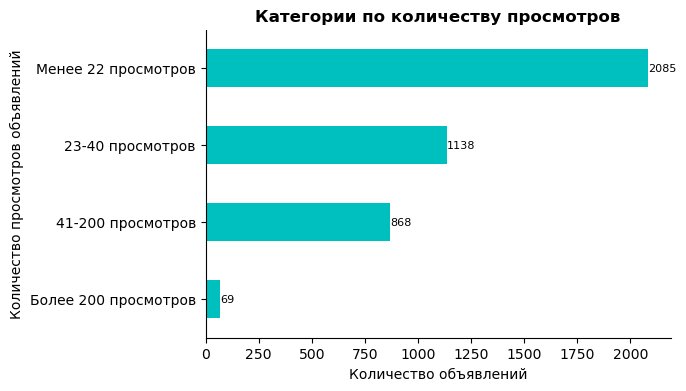

In [417]:
fig, ax = plt.subplots(figsize = (6,4))
df['Views_type'].value_counts().sort_values(ascending=True).plot(kind = 'barh', color = 'c')
ax.bar_label(ax.containers[0], fontsize = 8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Категории по количеству просмотров', fontweight = 'bold')
ax.set_xlabel('Количество объявлений')
ax.set_ylabel('Количество просмотров объявлений')
plt.show()

In [418]:
## По графику видно, что большинство квартир из списка набирает менее 22 просмотров
## Тех, которые набирают до 40 просмотров в два раза меньше
## Еще меньше тех, что набирают до 200 просмотров
## Можно сделать вывод, что на рынке большинство предложений не подходят под критерии выбора для арендаторов

2.2. Стоимость

In [419]:
## Сгруппируем данные по стоимости жилья

In [420]:
print(df['Price'].var(ddof=0))
print(df['Price'].std(ddof=0))

112536104377.81328
335464.01353619626


In [421]:
## Большая разница в данных, что указывает на количество возможных вбросов

In [422]:
def rent_price(x):
    if x <= 65000:
        return 'Жилье до 65 тыс. рублей'
    elif x <= 200000:
        return 'Жилье от 65 до 200 тыс. рублей'
    elif x <= 336000:
        return 'Жилье от 200 до 336 тыс. рублей'
    elif x > 336000:
        return 'Жилье дороже 336 тыс. рублей'
    else:
        return '99999'

In [423]:
## Добавим столбец с категориями

In [424]:
df['Rent_price'] = df['Price'].apply(rent_price)
df[:4]

,№,Unnamed: 0,Metro,Price,Minutes,Way,Provider,Fee_Percent,Views,Storey,Storeys,Rooms,Total_Area,Living_Area,Kitchen_Area,Way_code,Views_type,Rent_price
0,1,0,Baumanskaia,80000,13,1,agency,50,127,5,8,2,50,30,6,99999,41-200 просмотров,Жилье от 65 до 200 тыс. рублей
1,2,1,Kommunarka,27000,3,0,owner,0,23,12,15,1,38,17,12,99999,23-40 просмотров,Жилье до 65 тыс. рублей
2,3,2,Michurinskii prospekt,150000,5,1,realtor,0,56,17,24,4,130,70,15,99999,41-200 просмотров,Жилье от 65 до 200 тыс. рублей
3,4,3,Khovrino,47000,10,1,realtor,50,748,6,17,2,55,32,9,99999,Более 200 просмотров,Жилье до 65 тыс. рублей


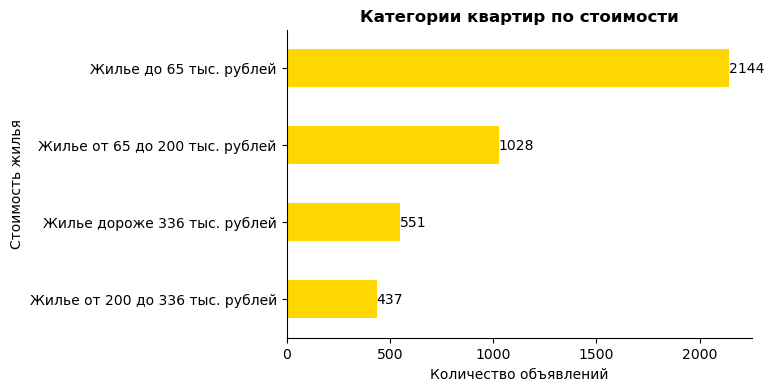

In [425]:
ig, ax = plt.subplots(figsize = (6,4))
df['Rent_price'].value_counts().sort_values(ascending=True).plot(kind = 'barh', color = 'gold')
ax.bar_label(ax.containers[0], fontsize = 10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Категории квартир по стоимости', fontweight = 'bold')
ax.set_xlabel('Количество объявлений')
ax.set_ylabel('Стоимость жилья')
plt.show()

In [426]:
# На рынке больше всего предложений дешевле 65 000 рублей, до 200 000 рублей предложений в 2 раза меньше

2.3. Провайдеры

In [427]:
## 4 провайдера: больше всего предложений от агентств и застройщиков. Посмотрим это на графике

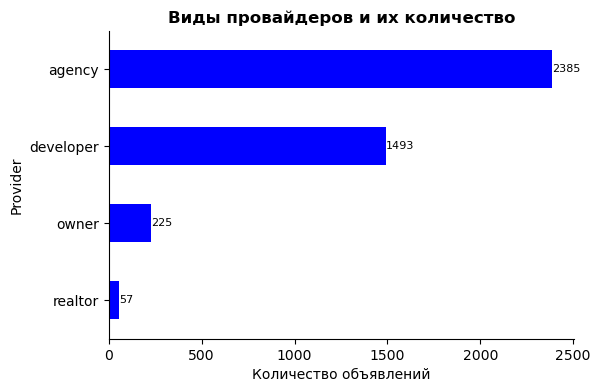

In [428]:
fig, ax = plt.subplots(figsize = (6,4))
df['Provider'].value_counts().sort_values(ascending=True).plot(kind = 'barh', color = 'blue')
ax.bar_label(ax.containers[0], fontsize = 8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Виды провайдеров и их количество', fontweight = 'bold')
ax.set_xlabel('Количество объявлений')
plt.show()

In [429]:
## Чаще всего провайдерами являются агентства или застройщики

2.4. Комиссия

In [430]:
df.Fee_Percent.describe()

count    4160.000000
mean       28.318750
std        28.657093
min         0.000000
25%         0.000000
50%        40.000000
75%        50.000000
max       100.000000
Name: Fee_Percent, dtype: float64

In [431]:
def fee_tipe(у):
    if у == 0:
        return 'Без комиссии (0%)'
    elif у < 50:
        return 'Комиссия меньше 50%'
    elif у < 100:
        return 'Комиссия 50-99%'
    elif у == 100:
        return 'Комиссия 100%'
    else:
        return '99999'

In [432]:
df['Fee_tipe'] = df['Fee_Percent'].apply(fee_tipe)
df[:4]

,№,Unnamed: 0,Metro,Price,Minutes,Way,Provider,Fee_Percent,Views,Storey,Storeys,Rooms,Total_Area,Living_Area,Kitchen_Area,Way_code,Views_type,Rent_price,Fee_tipe
0,1,0,Baumanskaia,80000,13,1,agency,50,127,5,8,2,50,30,6,99999,41-200 просмотров,Жилье от 65 до 200 тыс. рублей,Комиссия 50-99%
1,2,1,Kommunarka,27000,3,0,owner,0,23,12,15,1,38,17,12,99999,23-40 просмотров,Жилье до 65 тыс. рублей,Без комиссии (0%)
2,3,2,Michurinskii prospekt,150000,5,1,realtor,0,56,17,24,4,130,70,15,99999,41-200 просмотров,Жилье от 65 до 200 тыс. рублей,Без комиссии (0%)
3,4,3,Khovrino,47000,10,1,realtor,50,748,6,17,2,55,32,9,99999,Более 200 просмотров,Жилье до 65 тыс. рублей,Комиссия 50-99%


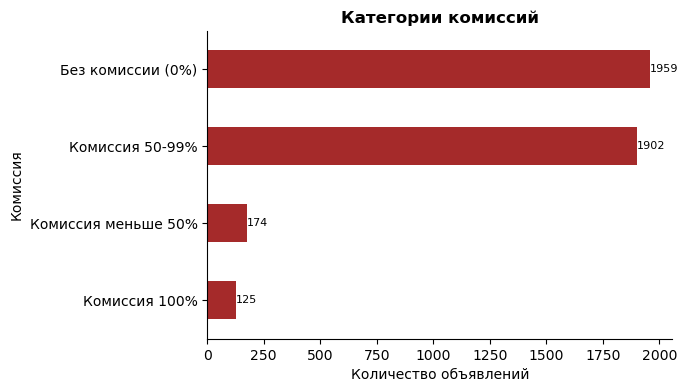

In [433]:
fig, ax = plt.subplots(figsize = (6,4))
df['Fee_tipe'].value_counts().sort_values(ascending=True).plot(kind = 'barh', color = 'brown')
ax.bar_label(ax.containers[0], fontsize = 8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Категории комиссий', fontweight = 'bold')
ax.set_xlabel('Количество объявлений')
ax.set_ylabel('Комиссия')
plt.show()

In [434]:
## Чаще всего у объявлений комиссии либо нет совсем, либо она от 50 до 100%

2.5. Посмотрим распределение по количеству комнат

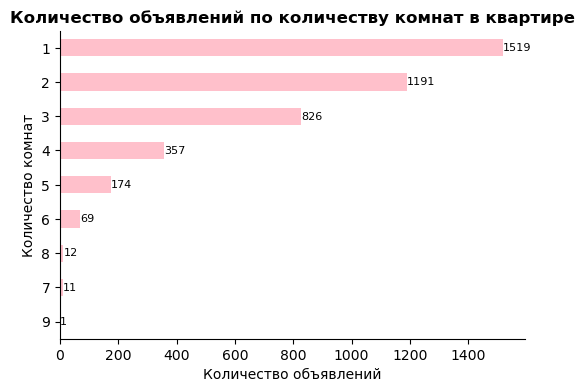

In [435]:
fig, ax = plt.subplots(figsize = (6,4))
df['Rooms'].value_counts().sort_values(ascending=True).plot(kind = 'barh', color = 'pink')
ax.bar_label(ax.containers[0], fontsize = 8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Количество объявлений по количеству комнат в квартире', fontweight = 'bold')
ax.set_xlabel('Количество объявлений')
ax.set_ylabel('Количество комнат')
plt.show()

In [436]:
## Больше предложений однокомнатных, двухкомнатных и трехкомнатных квартир

2.6. Путь до метро

In [437]:
## Посмотрим распределение по способам пути до метро и переведем в числа для дальнейшего анализа

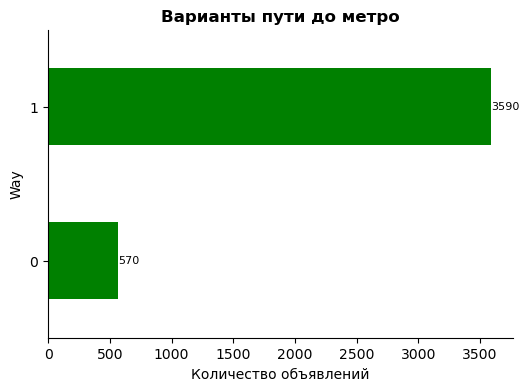

In [438]:
fig, ax = plt.subplots(figsize = (6,4))
df['Way'].value_counts().sort_values(ascending=True).plot(kind = 'barh', color = 'green')
ax.bar_label(ax.containers[0], fontsize = 8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Варианты пути до метро', fontweight = 'bold')
ax.set_xlabel('Количество объявлений')
plt.show()

In [439]:
## Больше всего предложений, где до метро можно дойти пешком

## Часть 3. Анализ влияния факторов на просмотры

In [440]:
df.pivot_table(index = 'Views_type',
              values = ['Fee_Percent', 'Storey', 'Storeys', 'Rooms'],
              aggfunc = ['median', 'mean'])

median                             mean            \
                     Fee_Percent Rooms Storey Storeys Fee_Percent     Rooms   
Views_type                                                                    
23-40 просмотров              50     2      6      14   30.348858  2.184534   
41-200 просмотров              0     3      6      12   16.283410  2.891705   
Более 200 просмотров           0     2      7      12   23.463768  2.347826   
Менее 22 просмотров           50     2      6      14   32.381775  1.973621   

                                             
                         Storey     Storeys  
Views_type                                   
23-40 просмотров       8.204745   35.503515  
41-200 просмотров      9.754608   25.733871  
Более 200 просмотров  11.840580   20.782609  
Менее 22 просмотров    9.689209  121.870024

In [441]:
df.pivot_table(index = 'Views_type',
              values = ['Price', 'Minutes', 'Total_Area', 'Living_Area', 'Kitchen_Area'],
              aggfunc = ['mean', 'median'])

mean                                       \
                     Kitchen_Area Living_Area   Minutes          Price   
Views_type                                                               
23-40 просмотров        29.628295   48.109842  8.801406  175252.909490   
41-200 просмотров       36.775346   61.020737  7.633641  309728.559908   
Более 200 просмотров    25.347826   57.260870  8.362319  273372.521739   
Менее 22 просмотров     27.541966   44.216307  8.609592  138281.602878   

                                      median                              \
                     Total_Area Kitchen_Area Living_Area Minutes   Price   
Views_type                                                                 
23-40 просмотров      62.775044           12          51       9   65000   
41-200 просмотров     79.358295           25          64       7  200000   
Более 200 просмотров  86.884058           12          46       7   60000   
Менее 22 просмотров   58.224940           10          38       9   60000   

                                 
                     Total_Area  
Views_type                       
23-40 просмотров             64  
41-200 просмотров            64  
Более 200 просмотров         64  
Менее 22 просмотров          60

In [442]:
## Можно заметить, что в среднем до представленных квартир добираться до метро нужно около 8 минут

In [443]:
## Посмотрим, какой критерий сильнее влияет на просмотры квартиры

In [444]:
X = df[['Price', 'Minutes', 'Way', 'Fee_Percent', 'Storey', 'Storeys', 'Rooms', 'Total_Area', 'Living_Area', 'Kitchen_Area' ]] 
y = df['Views']

model = LinearRegression()
model.fit(X, y)

feature_importance = pd.Series(model.coef_, index=X.columns)
print(feature_importance.sort_values(ascending=False))

Way             11.306933
Rooms            3.764187
Total_Area       0.241890
Minutes          0.235304
Storey           0.094227
Kitchen_Area     0.083367
Price            0.000009
Storeys         -0.001494
Fee_Percent     -0.137927
Living_Area     -0.375135
dtype: float64


In [445]:
## Положительный коэффициент у Way говорит о том, что увеличение значения связано с увеличением просмотров. 
## Это указывает на сильное влияние фактора способа передвижения до метро
## Также видим сильную взаимосвязь между количеством комнат в квартире
## Большое влияние оказывает жилая площадь и комиссия провайдера
## Цена практически не влияет на количество просмотров

C:\Users\demko\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


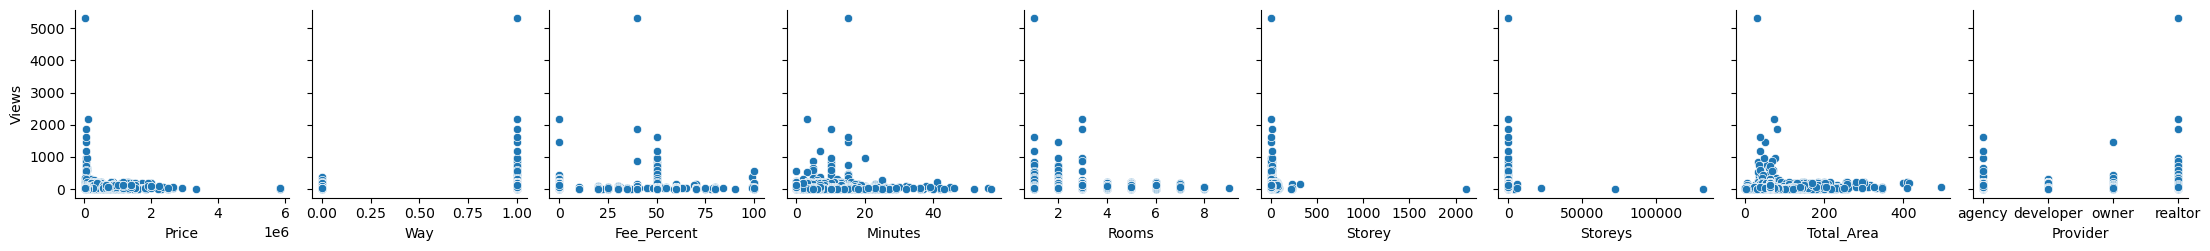

In [446]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, x_vars=['Price', 'Way', 'Fee_Percent', 'Minutes', 'Rooms', 'Storey', 'Storeys', 'Total_Area', 'Provider'], y_vars='Views', kind='scatter')
plt.show()

In [447]:
## На графике видно одно объявления, которое собирает 5000 просмотров, необходимо проанализировать его дополнительно

3.1 Влияние станции метро на просмотры

In [448]:
metro_views = df.groupby('Metro')['Views'].sum().reset_index()
metro_views = metro_views.sort_values(by='Views', ascending=False)
top_20_stations = metro_views.head(20)

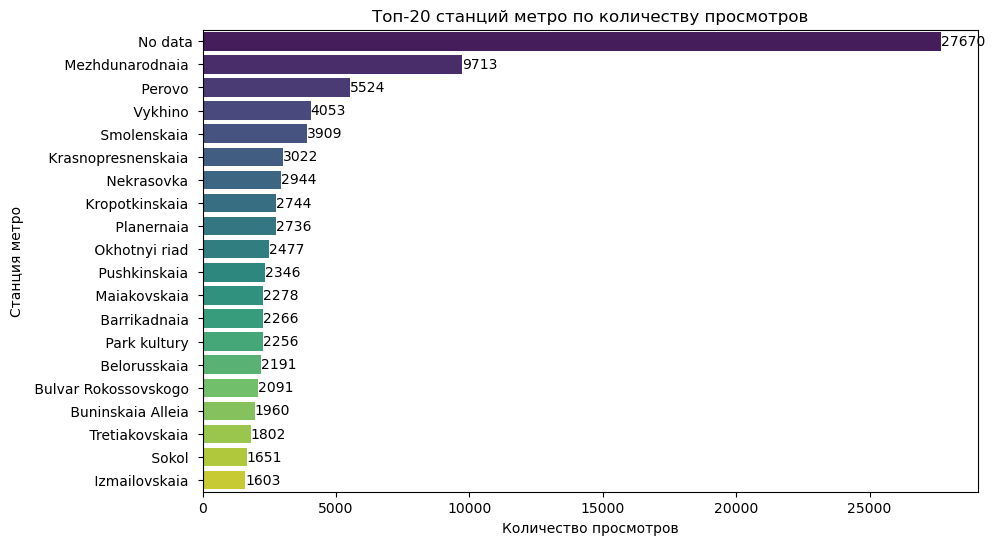

In [449]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Views', y='Metro', data=top_20_stations, palette='viridis')
for index, value in enumerate(top_20_stations['Views']):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10)
plt.xlabel('Количество просмотров')
plt.ylabel('Станция метро')
plt.title('Топ-20 станций метро по количеству просмотров')
plt.show()

In [450]:
## Больше всего просмотров у объявлений без указания станции метро.
## Самые популярные станции: Международная, Перово, Выхино и Смоленская

In [451]:
## Посмотрим, какое количество объявлений на этих станциях

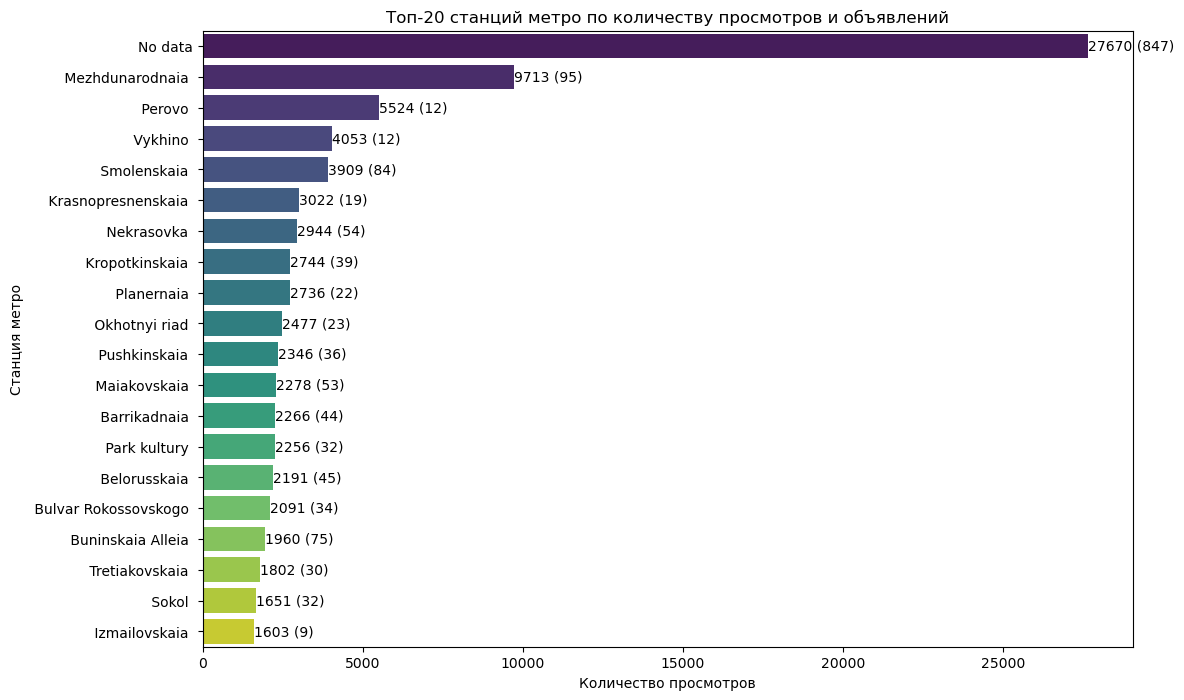

In [452]:
metro_data = df.groupby('Metro').agg({'Views': 'sum', '№': 'count'}).reset_index()

# Сортировка данных по убыванию просмотров
metro_data = metro_data.sort_values(by='Views', ascending=False)

# Выбор только топ-20 станций
top_20_stations = metro_data.head(20)

# Построение графика
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Views', y='Metro', data=top_20_stations, palette='viridis', ax=ax)

# Добавление подписей справа (просмотры)
for index, (value, ad_count) in enumerate(zip(top_20_stations['Views'], top_20_stations['№'])):
    ax.text(value, index, f'{value} ({ad_count})', va='center', ha='left', fontsize=10)


plt.xlabel('Количество просмотров')
plt.ylabel('Станция метро')
plt.title('Топ-20 станций метро по количеству просмотров и объявлений')
plt.show()

In [453]:
## Видно, что не смотря на то, что объявлений на Перово и Выхино меньше, но они более популярны для арнедаторов, 
## чем квартиры на Смоленской. Посмотрим, какое у них отклонение

In [454]:
top_20_stations['ViewPercentage'] = top_20_stations['Views'] / top_20_stations['№']
print(top_20_stations[['Metro', 'Views', '№', 'ViewPercentage']])

                      Metro  Views    №  ViewPercentage
212                 No data  27670  847       32.668241
92         Mezhdunarodnaia    9713   95      102.242105
125                 Perovo    5524   12      460.333333
208                Vykhino    4053   12      337.750000
163            Smolenskaia    3909   84       46.535714
67      Krasnopresnenskaia    3022   19      159.052632
102             Nekrasovka    2944   54       54.518519
71          Kropotkinskaia    2744   39       70.358974
131             Planernaia    2736   22      124.363636
111          Okhotnyi riad    2477   23      107.695652
142           Pushkinskaia    2346   36       65.166667
86            Maiakovskaia    2278   53       42.981132
11            Barrikadnaia    2266   44       51.500000
121           Park kultury    2256   32       70.500000
16            Belorusskaia    2191   45       48.688889
27    Bulvar Rokossovskogo    2091   34       61.500000
28       Buninskaia Alleia    1960   75       26

C:\Users\demko\AppData\Local\Temp\ipykernel_9220\4260235217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_stations['ViewPercentage'] = top_20_stations['Views'] / top_20_stations['№']


In [455]:
## Исходя из этих данных можно предположить, что наиболее привлекательные квартиры на:
## Перово, Выхино, Краснопресненской, Планетарной, Охотном ряду и Международной

## Часть 4. Проанализируем влияние каждого фактора отдельно

4.1. Вид провайдера

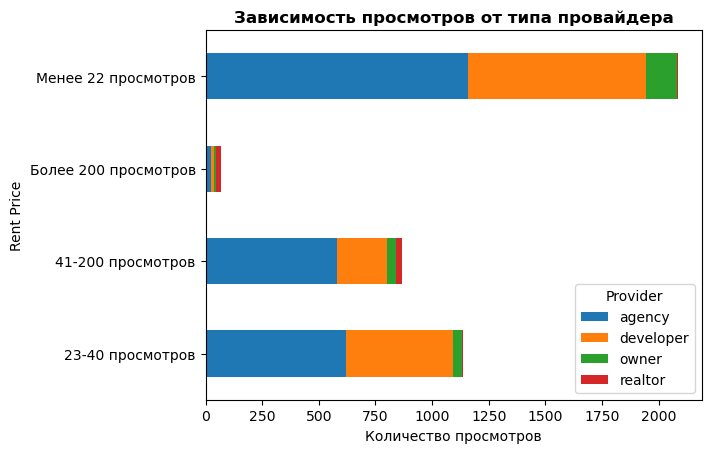

In [457]:
ax = df.groupby('Views_type')['Provider'].value_counts(ascending=True).unstack().plot(kind='barh', stacked=True)



# Добавление заголовка и меток осей
plt.title('Зависимость просмотров от типа провайдера', fontweight='bold')
plt.xlabel('Количество просмотров')
plt.ylabel('Rent Price')

plt.show()

In [458]:
## Наиболее популярные объявления от агентства, потом от застройщика, но эти типы провайдеров преобладают на рынке.
## Более 500 просмотров набирают только объявения от риэлторов, среди агентств и застройщиков люди больше предпочитают
## объявления от агентств, так как среди их объявлений больше тех, где более 100 просмотров

In [459]:
## Посмотрим, как стоимость жилья связана с провайдером

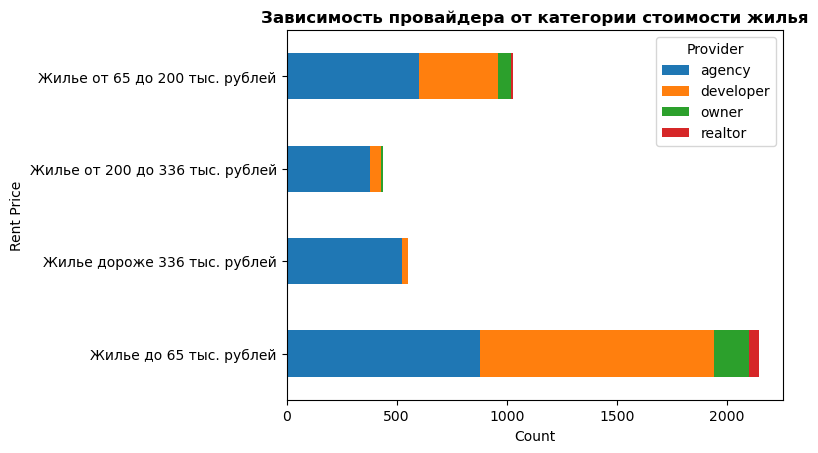

In [460]:
df.groupby('Rent_price')['Provider'].value_counts(ascending = True).\
unstack().plot(kind ='barh', stacked = True)

plt.title('Зависимость провайдера от категории стоимости жилья', fontweight = 'bold')
plt.xlabel('Count')
plt.ylabel('Rent Price')

plt.show()

In [461]:
## На графике видно, что в категории жилья стоимостью свыше 200 000 рублей основной провайдер агентство
## А в наиболее дешевой категории чаще всего встречаются застройщики и риэлторы

4.2. Цена

In [462]:
## Посмотрим, есть ли зависимость между категорией стоимости жилья и просмотрами

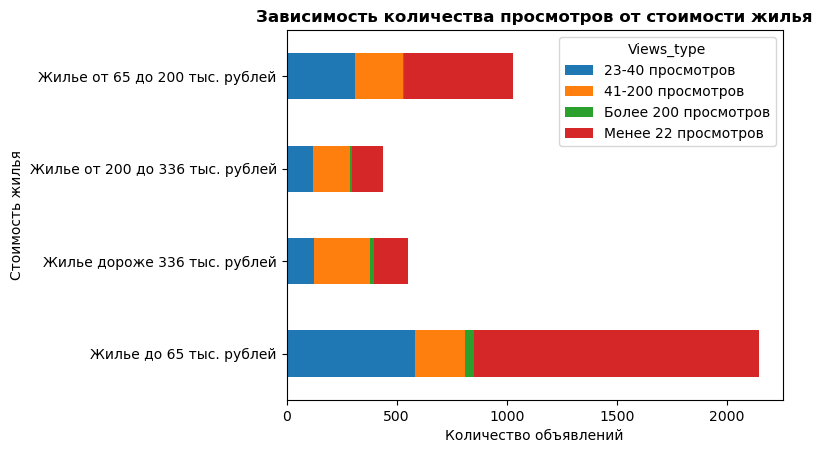

In [463]:
df.groupby('Rent_price')['Views_type'].value_counts(ascending = True).\
unstack().plot(kind ='barh', stacked = True)

plt.title('Зависимость количества просмотров от стоимости жилья', fontweight = 'bold')
plt.xlabel('Количество объявлений')
plt.ylabel('Стоимость жилья')

plt.show()

In [464]:
## В среднем каждый тип жилья набирает до 200 просмотров, наиболее непривлекательные объявления дешевле 65 000 рублей
## В категории жилья до 65 000 рублей есть  и те, которые набирают более 200 просмотров, как и в объявлениях дороже 200 000 рублей
## больше всего просмотров набирают объявления дороже 200 000 рублей


In [465]:
## Мы помним, что были вбросы, почистим от них данные

In [466]:
q3 = np.percentile(df['Price'],75)
q1 = np.percentile(df['Price'],25)
print(q3, q1)

200000.0 45000.0


In [467]:
iqr = q3 - q1
print(iqr)

155000.0


In [468]:
iqr_price_bottom = q1 - 1.5 * iqr
iqr_price_top = q3 + 1.5 * iqr
print(iqr_price_bottom, iqr_price_top)

-187500.0 432500.0


In [469]:
df[df['Price'] > iqr_price_top].shape

(443, 19)

In [470]:
df[df['Price'] > iqr_price_top]['Views_type'].value_counts()

Views_type
41-200 просмотров       196
Менее 22 просмотров     131
23-40 просмотров        100
Более 200 просмотров     16
Name: count, dtype: int64

In [471]:
df[df['Price'] > iqr_price_top]['Provider'].value_counts()

Provider
agency       430
developer     13
owner          0
realtor        0
Name: count, dtype: int64

In [472]:
## Много выбросов по цене от агентств

4.2. Способ пути до метро (предпочтительнее пешком)

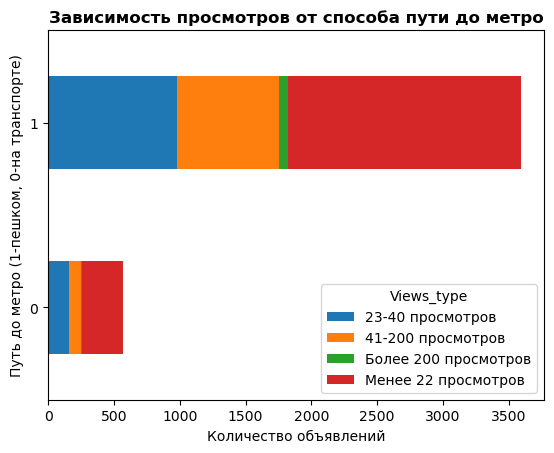

In [473]:
df.groupby('Way')['Views_type'].value_counts(ascending = True).\
unstack().plot(kind ='barh', stacked = True)

plt.title('Зависимость просмотров от способа пути до метро', fontweight = 'bold')
plt.xlabel('Количество объявлений')
plt.ylabel('Путь до метро (1-пешком, 0-на транспорте)')

plt.show()

In [474]:
## Видно, что среднее количество просмотров у квартир, где до метро можно дойти пешком, выше, чем там, где надо добираться на транспоре
## При этом, если рассмотреть более детально, то мы увидим, что там, где до метро можно дойти пешком,
## чаще встречаются объявления, где более 40 просмотров

4.5. Количество комнат 

In [475]:
## Посмотрим, какое количество комнат предпочитают люди

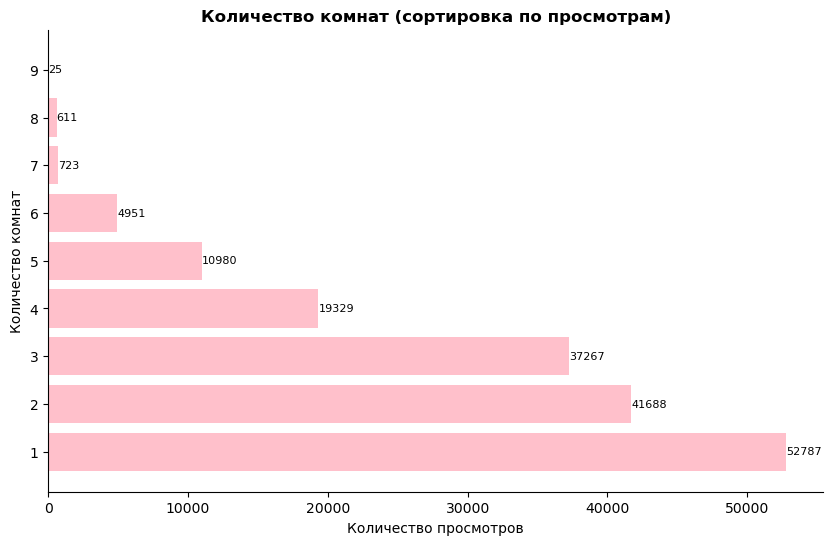

In [476]:
fig, ax = plt.subplots(figsize=(10, 6))
counts = df.groupby('Rooms')['Views'].sum().sort_values(ascending=True)
bars = plt.barh(counts.index, counts.values, color='pink')


plt.bar_label(bars, fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks(counts.index)

ax.set_title('Количество комнат (сортировка по просмотрам)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
ax.set_xlabel('Количество просмотров')
ax.set_ylabel('Количество комнат')

plt.show()

In [477]:
## Как видно по графику, наиболее популярные квартиры с 1 комнатой, двумя и тремя.
## На некоторых трехкомнатных квартирах просмотры доходят до 2000

In [478]:
## Но все же наиболее популярные по просмотрам однокомнатные и двухкомнатные квартиры

C:\Users\demko\AppData\Local\Temp\ipykernel_9220\1328701938.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rooms'].dropna())


Text(0, 0.5, 'Плотность')

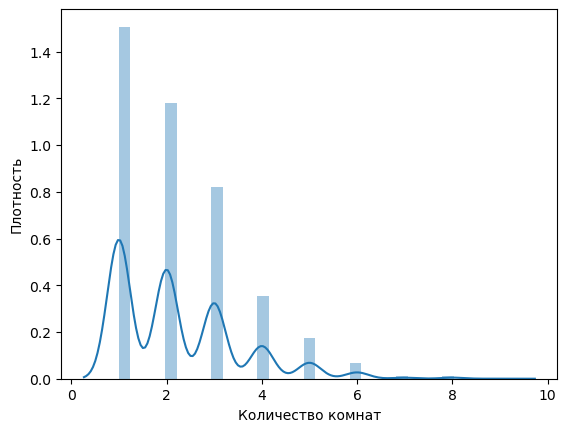

In [479]:
sns.distplot(df['Rooms'].dropna())
plt.xlabel('Количество комнат')
plt.ylabel('Плотность')

In [480]:
lower_bound = df['Rooms'].mean()-3*df['Rooms'].std()
upper_bound = df['Rooms'].mean()+3*df['Rooms'].std()
print(lower_bound, upper_bound)

-1.65756563302179 6.115738709944868


In [481]:
df['Rooms']. corr(df['Views'])

0.07137318746687085

In [482]:
## Коэффициент корреляции равен 0.07137318746687094
## Поскольку эта корреляция положительная, это говорит нам о том, 
## что Кол-во комнат и Просмотры объявлений имеют положительную корреляцию.

In [483]:
print("Корреляция между 'Rooms' и 'View':")
print(df[['Rooms', 'Views']].corr())

Корреляция между 'Rooms' и 'View':
          Rooms     Views
Rooms  1.000000  0.071373
Views  0.071373  1.000000


In [484]:
## Видим, что чем 

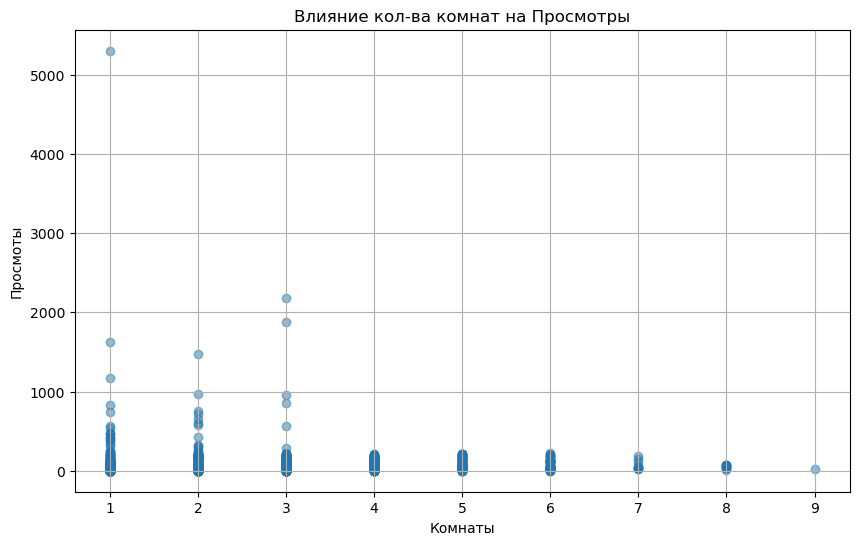

In [485]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Rooms'], df['Views'], alpha=0.5)
plt.title('Влияние кол-ва комнат на Просмотры')
plt.xlabel('Комнаты')
plt.ylabel('Просмоты')
plt.grid(True)
plt.show()

In [486]:
## Проанализруем квартиру, которая набрала максимальное количество просмотров

In [487]:
max_views_index = df['Views'].idxmax()

# Выводим данные этой строки
row_with_max_views = df.loc[max_views_index]
print(row_with_max_views)

№                                    13
Unnamed: 0                           12
Metro                           Perovo 
Price                             29000
Minutes                              15
Way                                   1
Provider                        realtor
Fee_Percent                          40
Views                              5304
Storey                                2
Storeys                               5
Rooms                                 1
Total_Area                           31
Living_Area                          17
Kitchen_Area                          7
Way_code                          99999
Views_type         Более 200 просмотров
Rent_price      Жилье до 65 тыс. рублей
Fee_tipe            Комиссия меньше 50%
Name: 12, dtype: object


In [488]:
##

4.6. Жилая площадь

In [489]:
print("Описание признака для 'Living_Area':")
print(df['Living_Area'].describe())

Описание признака для 'Living_Area':
count    4160.000000
mean       49.004087
std        28.822090
min         2.000000
25%        23.000000
50%        51.000000
75%        64.000000
max       388.000000
Name: Living_Area, dtype: float64


In [490]:
def categorize_living_area(area):
    if area <= 30:
        return 'Маленькая (до 30 кв.м)'
    elif area <= 50:
        return 'Средняя(от 31 до 50 кв.м)'
    elif area <= 90:
        return 'Большая (от 51 до 90 кв.м)'
    else:
        return 'Очень большая (более 91 кв.м)'

In [491]:
df['Сategorize_living_area'] = df['Living_Area'].apply(categorize_living_area)
df[:4]

,№,Unnamed: 0,Metro,Price,Minutes,Way,Provider,Fee_Percent,Views,Storey,Storeys,Rooms,Total_Area,Living_Area,Kitchen_Area,Way_code,Views_type,Rent_price,Fee_tipe,Сategorize_living_area
0,1,0,Baumanskaia,80000,13,1,agency,50,127,5,8,2,50,30,6,99999,41-200 просмотров,Жилье от 65 до 200 тыс. рублей,Комиссия 50-99%,Маленькая (до 30 кв.м)
1,2,1,Kommunarka,27000,3,0,owner,0,23,12,15,1,38,17,12,99999,23-40 просмотров,Жилье до 65 тыс. рублей,Без комиссии (0%),Маленькая (до 30 кв.м)
2,3,2,Michurinskii prospekt,150000,5,1,realtor,0,56,17,24,4,130,70,15,99999,41-200 просмотров,Жилье от 65 до 200 тыс. рублей,Без комиссии (0%),Большая (от 51 до 90 кв.м)
3,4,3,Khovrino,47000,10,1,realtor,50,748,6,17,2,55,32,9,99999,Более 200 просмотров,Жилье до 65 тыс. рублей,Комиссия 50-99%,Средняя(от 31 до 50 кв.м)


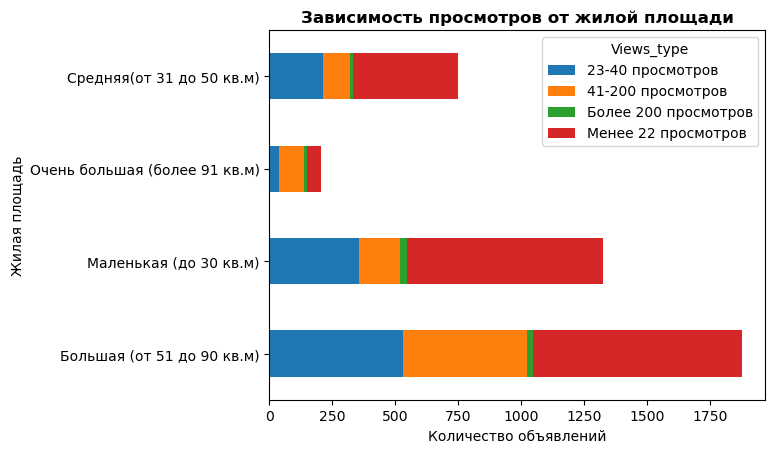

In [493]:
df.groupby('Сategorize_living_area')['Views_type'].value_counts(ascending = True).\
unstack().plot(kind ='barh', stacked = True)

plt.title('Зависимость просмотров от жилой площади', fontweight = 'bold')
plt.xlabel('Количество объявлений')
plt.ylabel('Жилая площадь')

plt.show()

In [494]:
## Наиболее популярные объявления с жилой площадью от 51 до 90 кв.м

In [495]:
# Анализ выбросов
# График "ящик с усами" для визуализации выбросов

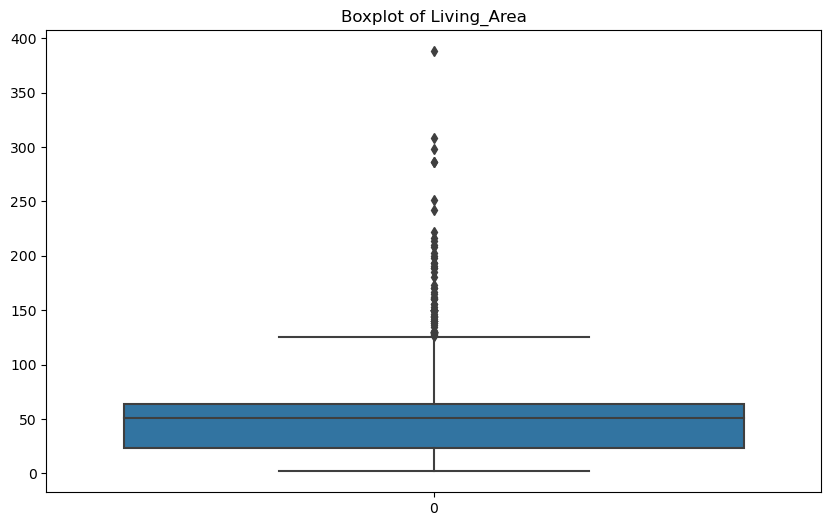

In [496]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Living_Area'])
plt.title("Boxplot of Living_Area")
plt.show()

In [497]:
## Чистим выбросы

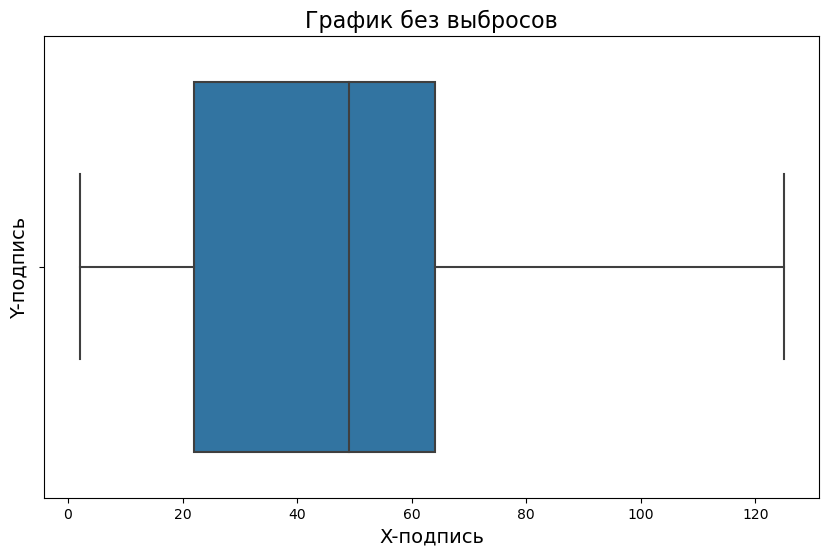

In [500]:
df_copy = df.copy()

# Определите столбец с данными
df_column_living = 'Living_Area'

# Определите межквартильный размах
Q1 = df_copy['Living_Area'].quantile(0.25)
Q3 = df_copy['Living_Area'].quantile(0.75)
IQR = Q3 - Q1

# Определите границы для удаления выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация данных для удаления выбросов
df_copy = df_copy[(df_copy['Living_Area'] >= lower_bound) & (df_copy['Living_Area'] <= upper_bound)]

# Постройте график после удаления выбросов (если нужно)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_copy['Living_Area'])
plt.title('График без выбросов', fontsize=16)
plt.xlabel('X-подпись', fontsize=14)
plt.ylabel('Y-подпись', fontsize=14)
plt.show()

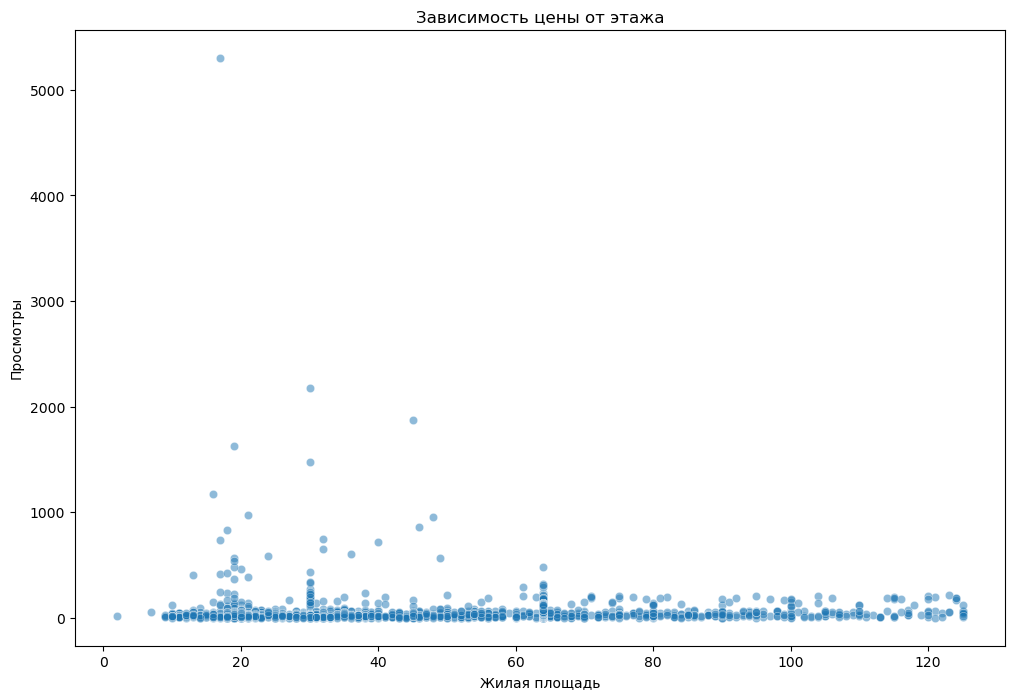

In [501]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Living_Area', y='Views', data=df_copy, alpha=0.5)

plt.xlabel('Жилая площадь')
plt.ylabel('Просмотры')
plt.title('Зависимость цены от этажа')
plt.show()

In [502]:
# Корреляционный анализ
# Предполагаем, что есть переменная "Rent_price" для цены аренды

In [503]:
print("Корреляция между 'Living_Area' и 'Price':")
print(df[['Living_Area', 'Price']].corr())

Корреляция между 'Living_Area' и 'Price':
             Living_Area     Price
Living_Area     1.000000  0.386419
Price           0.386419  1.000000


In [504]:
## Видим, что чем больше площадь, тем выше цена

In [505]:
# Статистический анализ
# Например, линейная регрессия для оценки влияния жилой площади на цену

In [506]:
# Построение модели

In [507]:
model = sm.OLS(y, X).fit()

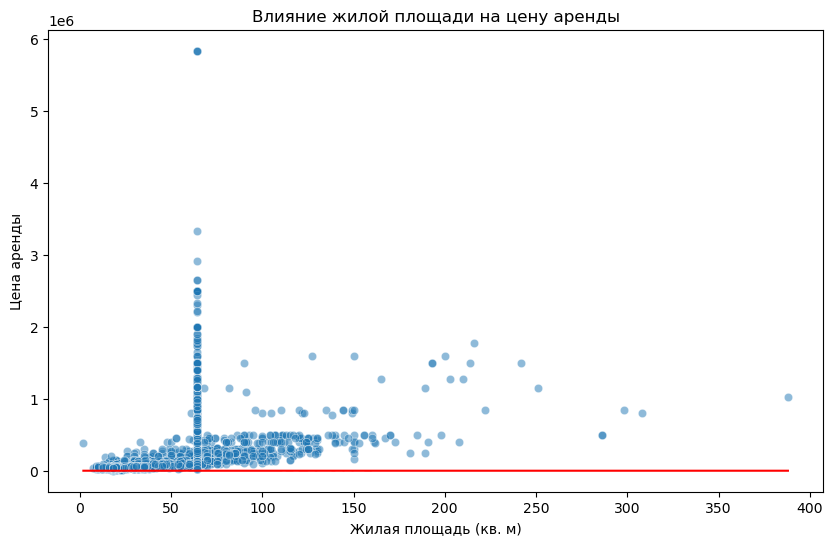

In [508]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Living_Area'], y=df['Price'], alpha=0.5)
sns.lineplot(x=df['Living_Area'], y=model.predict(X), color='red')
plt.title('Влияние жилой площади на цену аренды')
plt.xlabel('Жилая площадь (кв. м)')
plt.ylabel('Цена аренды')
plt.show()

In [509]:
# Коэффициент для 'Living_Area': Коэффициент для переменной 'Living_Area' составляет примерно 1333.46, что означает, что с каждым дополнительным квадратным метром жилой площади, ожидаемая цена аренды увеличивается в среднем на 1333.46.
#Статистическая значимость: P-значение для 'Living_Area' практически равно 0, что указывает на очень высокую статистическую значимость этого коэффициента. Это означает, что есть очень низкая вероятность получить такой или более значительный результат, если бы на самом деле не было взаимосвязи между жилой площадью и ценой аренды.
#R-квадрат: Значение R-квадрата составляет 0.278, что означает, что около 27.8% изменчивости в цене аренды можно объяснить через изменение жилой площади. Это умеренная степень объяснения вариативности цены аренды, что делает жилую площадь значимым, но не единственным фактором, влияющим на цену.
#Диапазон доверия: 95%-ный диапазон доверия для коэффициента 'Living_Area' лежит между 1268.18 и 1398.74, что указывает на точность оценок коэффициента.
#В целом, эти результаты показывают, что жилая площадь является важным фактором, влияющим на цену аренды, и что этот фактор имеет положительную корреляцию с ценой аренды. Тем не менее, поскольку R-квадрат не является очень высоким, существуют и другие факторы, которые также оказывают значительное влияние на цену аренды.

In [510]:
## для понимания рыночной цены, которую мы можем установить

In [511]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

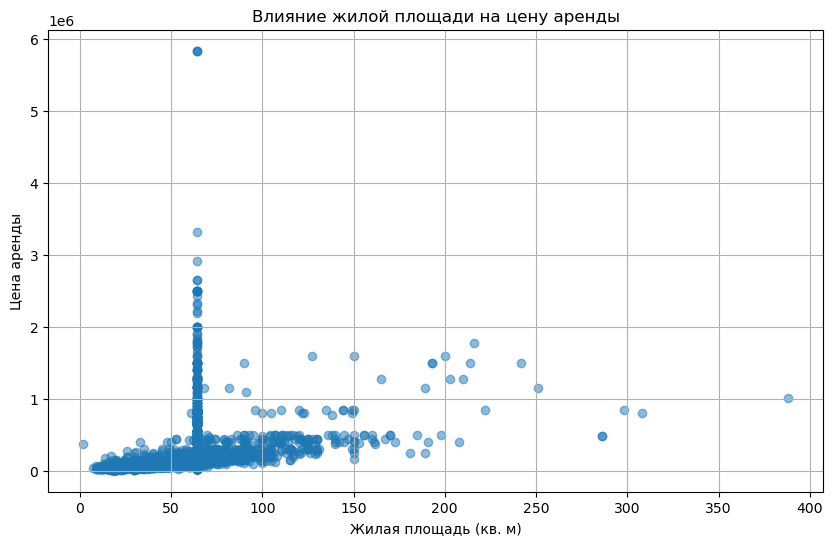

In [512]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Living_Area'], df['Price'], alpha=0.5)
plt.title('Влияние жилой площади на цену аренды')
plt.xlabel('Жилая площадь (кв. м)')
plt.ylabel('Цена аренды')
plt.grid(True)
plt.show()

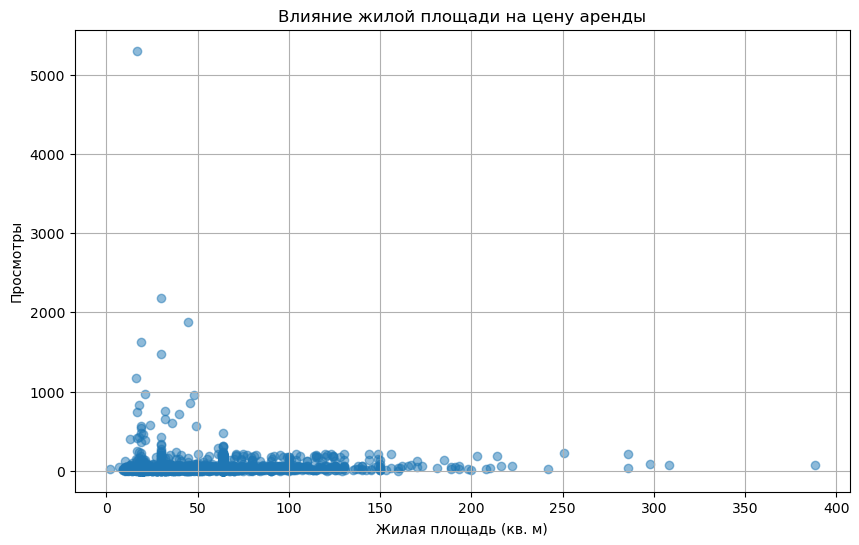

In [134]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Living_Area'], df['Views'], alpha=0.5)
plt.title('Влияние жилой площади на цену аренды')
plt.xlabel('Жилая площадь (кв. м)')
plt.ylabel('Просмотры')
plt.grid(True)
plt.show()

4.7. Общая площадь

In [513]:
# 1. Сортировка по просмотрам

In [514]:
grouped_total_area = df.groupby('Total_Area')['Views'].sum().sort_values()

In [515]:
# 2. и 3. Определение и исключение выбросов

In [516]:
Q1 = df['Total_Area'].quantile(0.25)
Q3 = df['Total_Area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['Total_Area'] >= lower_bound) & (df['Total_Area'] <= upper_bound)]

In [517]:
# 4. Построение графика без выбросов

Text(0, 0.5, 'Количество просмотров')

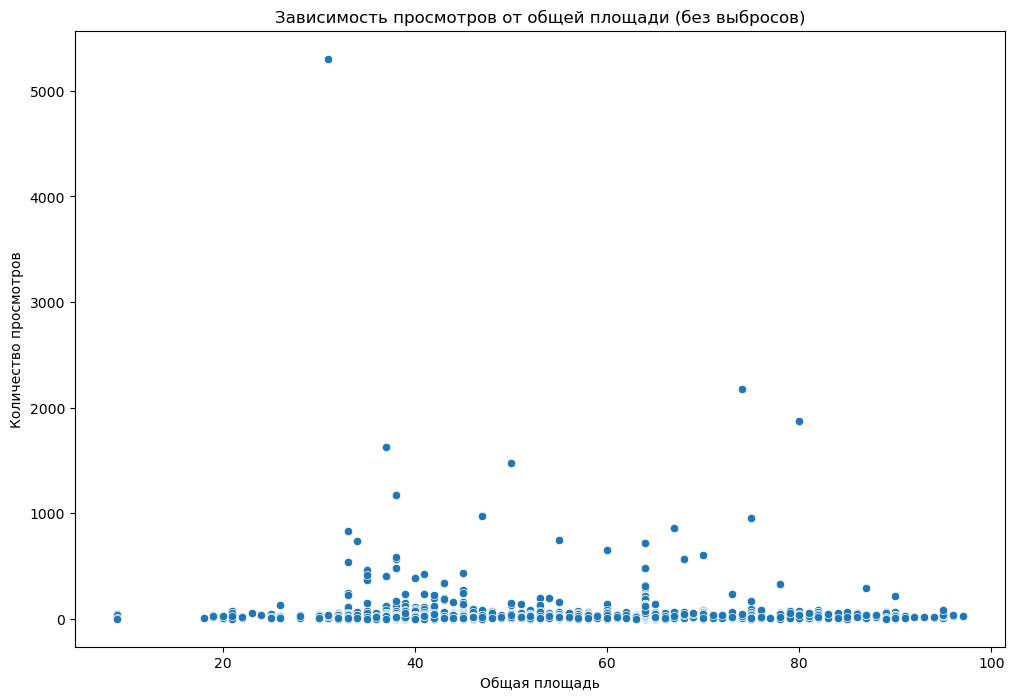

In [518]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total_Area', y='Views', data=df_filtered)
plt.title('Зависимость просмотров от общей площади (без выбросов)')
plt.xlabel('Общая площадь')
plt.ylabel('Количество просмотров')

In [519]:
# Корреляционный анализ

In [520]:
# Корреляционный анализ
correlation = df_filtered['Total_Area'].corr(df_filtered['Views'])
print(f"Корреляция между общей площадью и количеством просмотров: {correlation}")

Корреляция между общей площадью и количеством просмотров: 0.012804638570453324


In [521]:
# Определение функции для категоризации общей площади
def categorize_total_area(area):
    if area <= 30:
        return 'Маленькая (до 30 кв.м)'
    elif area <= 60:
        return 'Средняя (от 31 до 60 кв.м)'
    elif area <= 100:
        return 'Большая (от 61 до 100 кв.м)'
    else:
        return 'Очень большая (более 100 кв.м)'

In [522]:
# Применение функции категоризации к DataFrame
df['Total_Area_Category'] = df['Total_Area'].apply(categorize_total_area)

In [523]:
# Проверка результатов категоризации
print(df[['Total_Area', 'Total_Area_Category']].head())

   Total_Area             Total_Area_Category
0          50      Средняя (от 31 до 60 кв.м)
1          38      Средняя (от 31 до 60 кв.м)
2         130  Очень большая (более 100 кв.м)
3          55      Средняя (от 31 до 60 кв.м)
4          33      Средняя (от 31 до 60 кв.м)


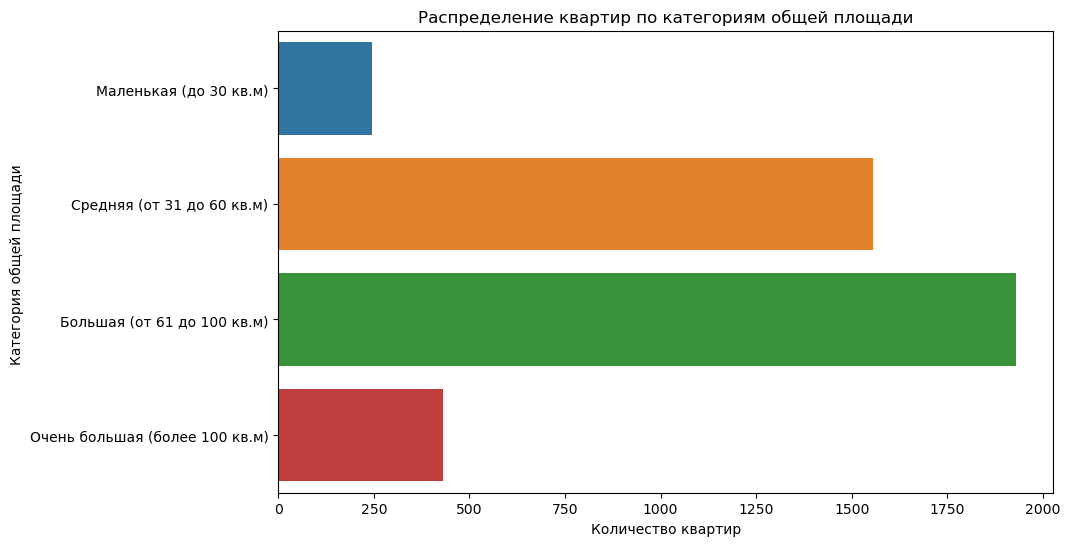

In [524]:
# Визуализация распределения категорий
plt.figure(figsize=(10, 6))
sns.countplot(y='Total_Area_Category', data=df, order=['Маленькая (до 30 кв.м)', 'Средняя (от 31 до 60 кв.м)', 'Большая (от 61 до 100 кв.м)', 'Очень большая (более 100 кв.м)'])
plt.title('Распределение квартир по категориям общей площади')
plt.xlabel('Количество квартир')
plt.ylabel('Категория общей площади ')
plt.show()

In [525]:
# Группировка данных по категориям стоимости и общей площади
grouped_data = df.groupby(['Rent_price', 'Total_Area_Category']).size().unstack()

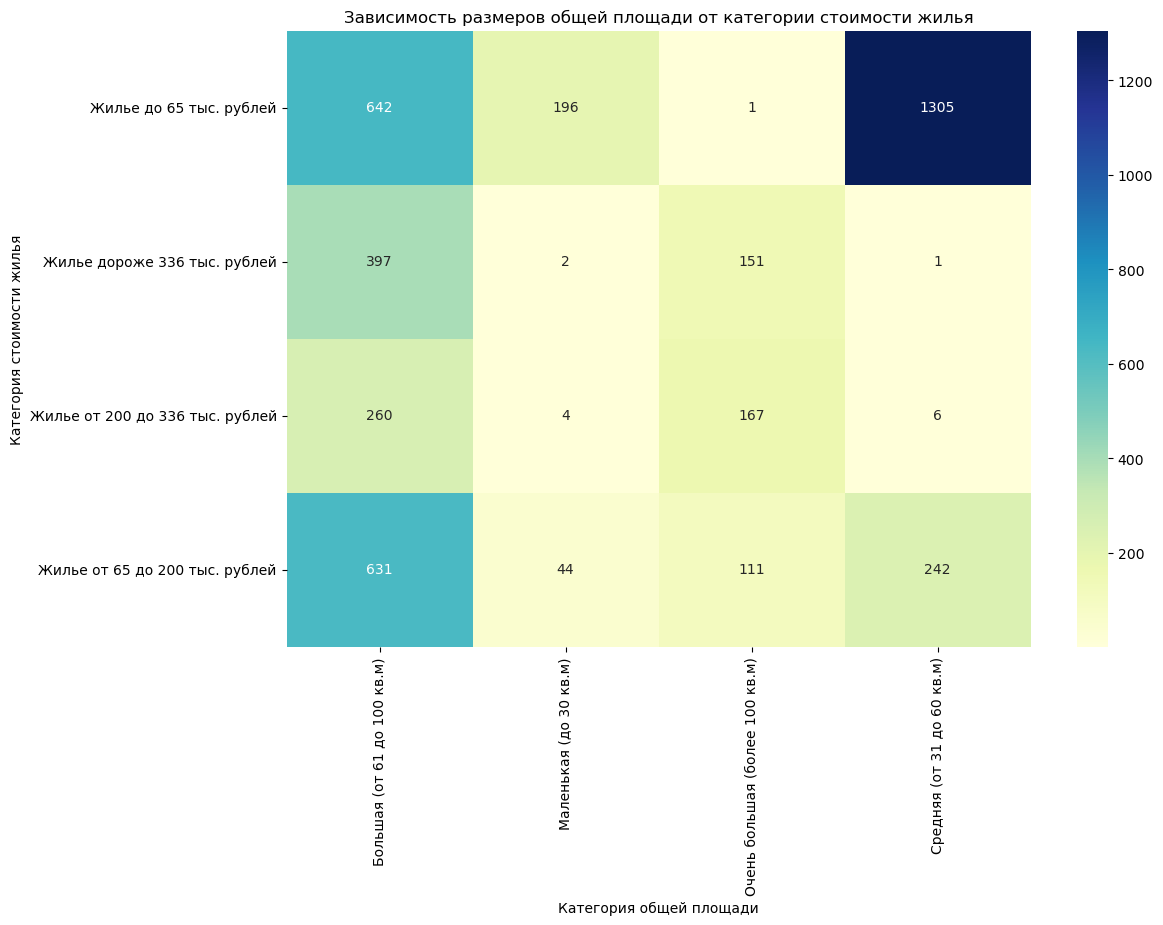

In [526]:
# Визуализация зависимости
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, fmt=".0f", cmap="YlGnBu")  # Изменен формат на ".0f"
plt.title('Зависимость размеров общей площади от категории стоимости жилья')
plt.xlabel('Категория общей площади')
plt.ylabel('Категория стоимости жилья')
plt.show()

4.8. Количество минут до метро

In [528]:
# 1. Сортировка по просмотрам
grouped_minutes = df.groupby('Minutes')['Views'].sum().sort_values(ascending=False)

In [529]:
# 2. и 3. Проверка на выбросы и их исключение
Q1_minutes = df['Minutes'].quantile(0.25)
Q3_minutes = df['Minutes'].quantile(0.75)
IQR_minutes = Q3_minutes - Q1_minutes
lower_bound_minutes = Q1_minutes - 1.5 * IQR_minutes
upper_bound_minutes = Q3_minutes + 1.5 * IQR_minutes
df_filtered_minutes = df[(df['Minutes'] >= lower_bound_minutes) & (df['Minutes'] <= upper_bound_minutes)]

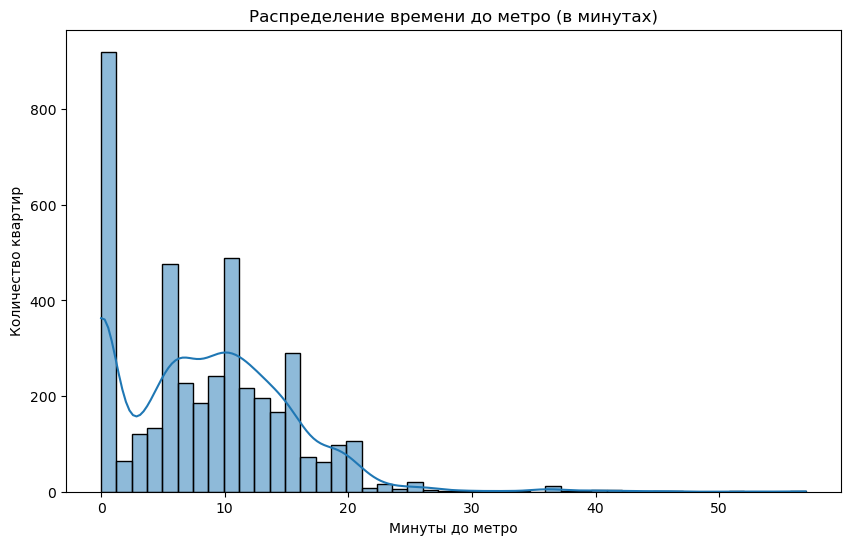

In [148]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Minutes'], kde=True)
plt.title("Распределение времени до метро (в минутах)")
plt.xlabel("Минуты до метро")
plt.ylabel("Количество квартир")
plt.show()

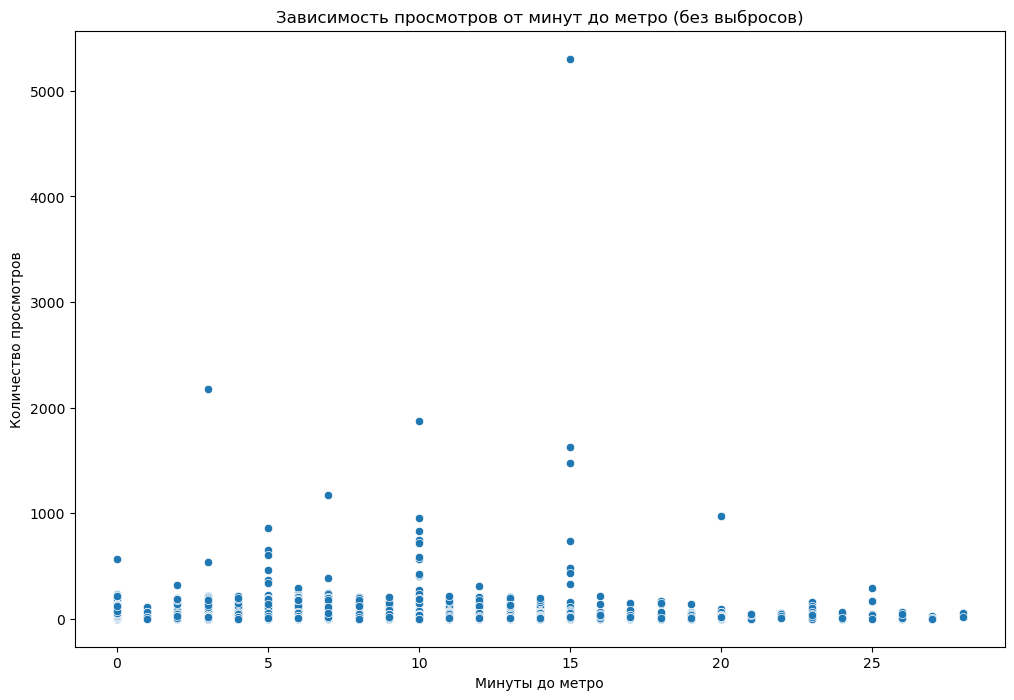

In [530]:
# 4. Построение графика без выбросов
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Minutes', y='Views', data=df_filtered_minutes)
plt.title('Зависимость просмотров от минут до метро (без выбросов)')
plt.xlabel('Минуты до метро')
plt.ylabel('Количество просмотров')
plt.show()

In [531]:
# 6. Зависимость просмотров от минут до метро
# Корреляционный анализ
correlation_minutes = df_filtered_minutes['Minutes'].corr(df_filtered_minutes['Views'])
print(f"Корреляция между минутами до метро и количеством просмотров: {correlation_minutes}")

Корреляция между минутами до метро и количеством просмотров: -0.010821940074341809


In [532]:
# 7. Категоризация минут до метро
def categorize_minutes(minutes):
    if minutes <= 5:
        return 'Очень близко'
    elif minutes <= 10:
        return 'Близко'
    elif minutes <= 20:
        return 'Среднее расстояние'
    else:
        return 'Далеко'

df['Minutes_Category'] = df['Minutes'].apply(categorize_minutes)

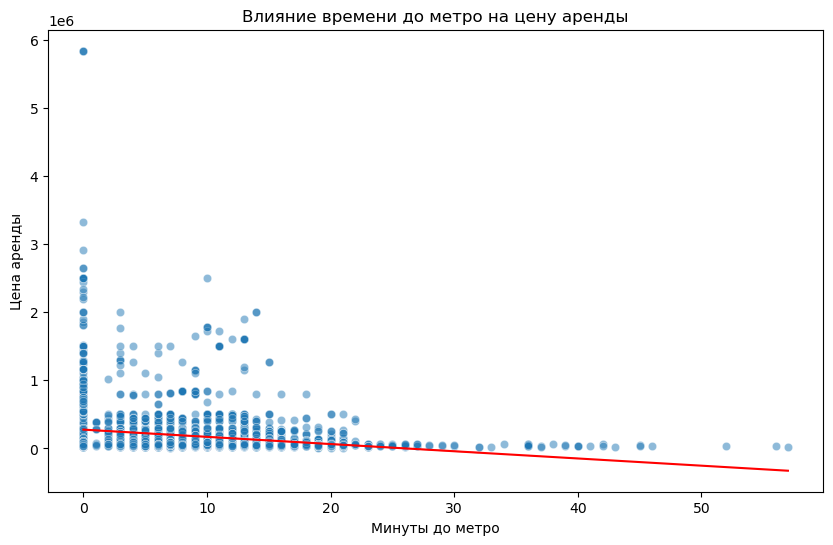

In [152]:
# 6. Визуализация взаимосвязи
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Minutes'], y=df['Price'], alpha=0.5)
sns.lineplot(x=df['Minutes'], y=model.predict(X), color='red')
plt.title('Влияние времени до метро на цену аренды')
plt.xlabel('Минуты до метро')
plt.ylabel('Цена аренды')
plt.show()

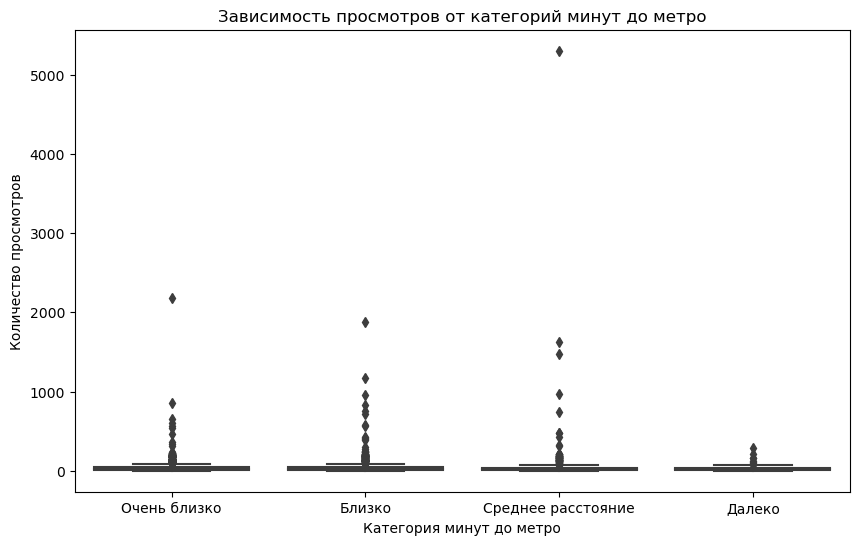

In [533]:
# Визуализация зависимости просмотров от категорий минут до метро
plt.figure(figsize=(10, 6))
sns.boxplot(x='Minutes_Category', y='Views', data=df, order=['Очень близко', 'Близко', 'Среднее расстояние', 'Далеко'])
plt.title('Зависимость просмотров от категорий минут до метро')
plt.xlabel('Категория минут до метро')
plt.ylabel('Количество просмотров')
plt.show()

In [534]:
# 8. Зависимость категорий стоимости жилья от минут до метро
# Группировка данных по категориям стоимости и минут до метро
grouped_by_price_minutes = df.groupby(['Rent_price', 'Minutes_Category']).size().unstack()

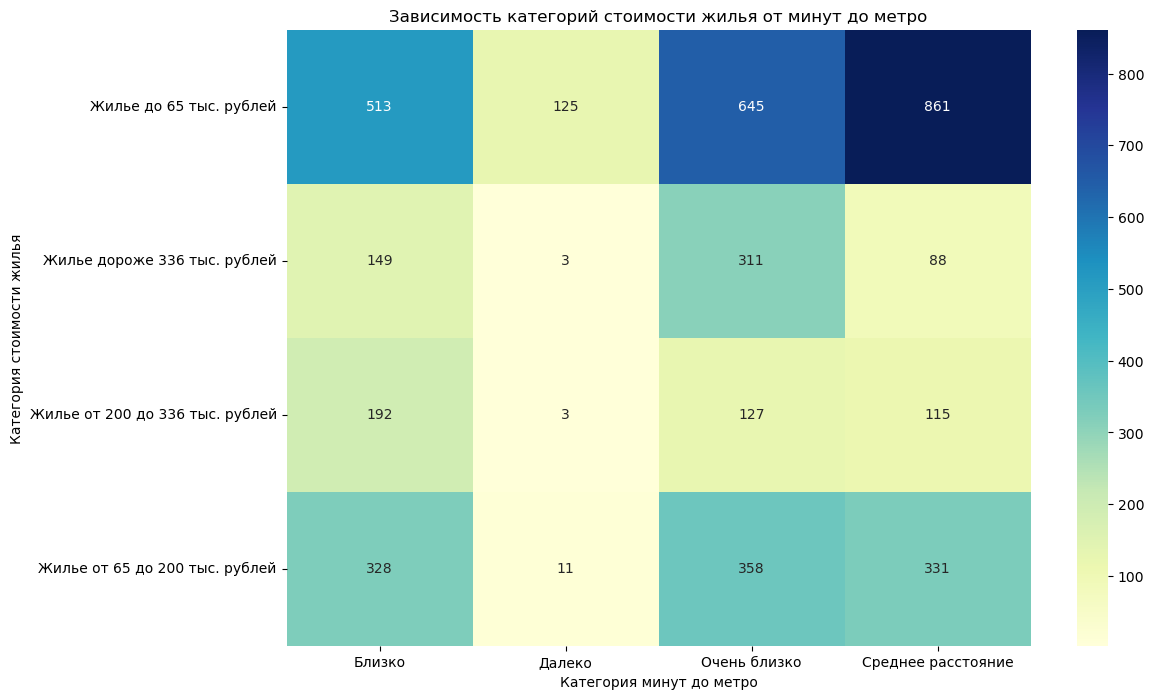

In [535]:
# Визуализация зависимости
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_by_price_minutes, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Зависимость категорий стоимости жилья от минут до метро')
plt.xlabel('Категория минут до метро')
plt.ylabel('Категория стоимости жилья')
plt.show()

4.9. Этаж (чем выше, тем лучше, но чем больше этажей в доме, тем хуже)

In [536]:
df.Storey.value_counts().head(40)

Storey
3     461
2     423
4     419
5     405
6     306
8     271
7     254
9     222
1     192
10    174
11    122
12    122
13    107
14     98
15     79
16     70
17     55
18     40
19     37
20     35
23     27
21     26
22     20
25     15
24     15
28     10
0       9
29      8
35      8
30      7
32      6
43      6
34      6
27      6
37      6
26      5
31      5
36      5
45      5
49      5
Name: count, dtype: int64

In [537]:
# 1. Описательная статистика и визуализация 'Storey' и 'Storeys'
print("Описательная статистика для 'Storey':")
print(df['Storey'].describe())
print("\nОписательная статистика для 'Storeys':")
print(df['Storeys'].describe())

Описательная статистика для 'Storey':
count    4160.000000
mean        9.332452
std        34.995281
min         0.000000
25%         3.000000
50%         6.000000
75%        10.000000
max      2113.000000
Name: Storey, dtype: float64

Описательная статистика для 'Storeys':
count      4160.000000
mean         76.507933
std        2361.254260
min           0.000000
25%           9.000000
50%          13.000000
75%          18.000000
max      131923.000000
Name: Storeys, dtype: float64


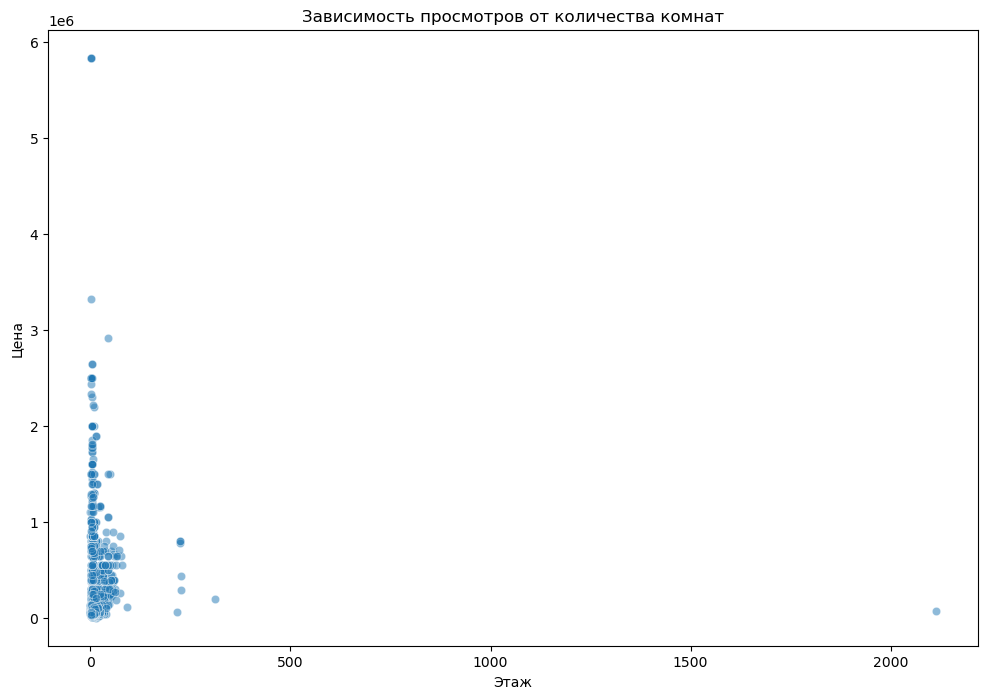

In [538]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Storey', y='Price', data=df, alpha=0.5)

plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.title('Зависимость просмотров от количества комнат')
plt.show()

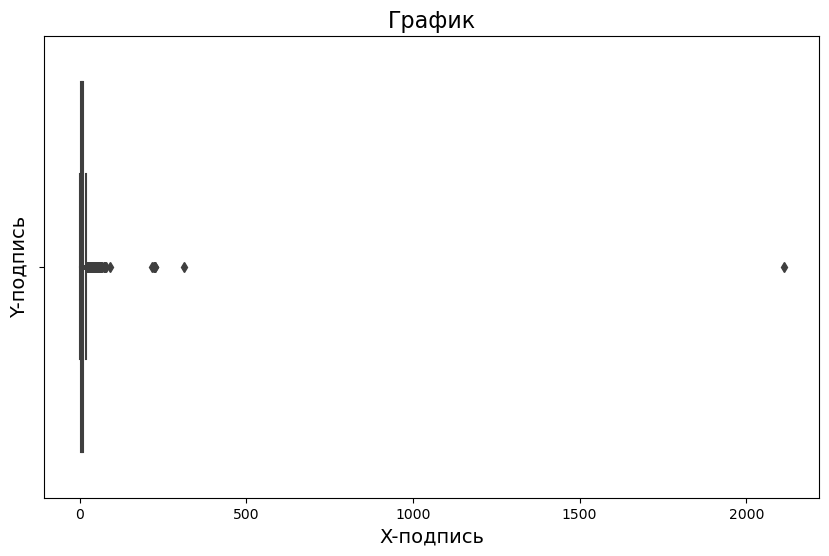

In [540]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Storey'])
plt.title('График', fontsize=16)
plt.xlabel('X-подпись', fontsize=14)
plt.ylabel('Y-подпись', fontsize=14)
plt.show()

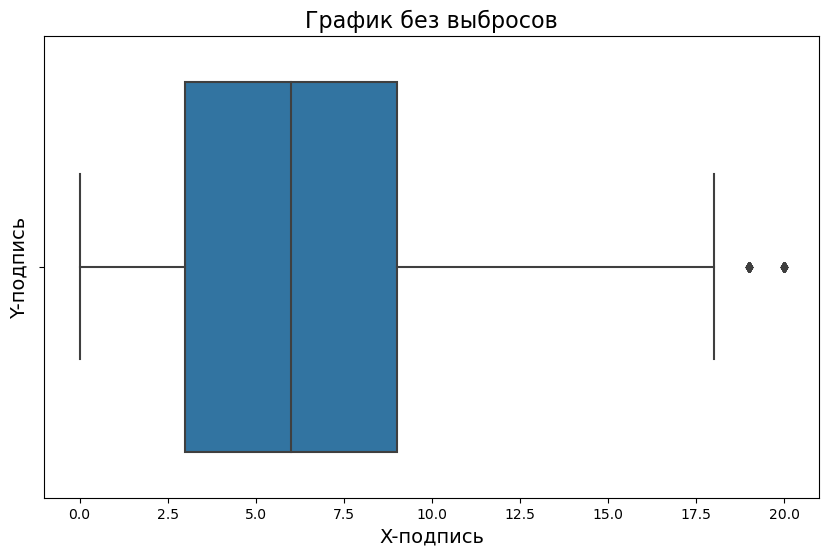

In [542]:
df_copy = df.copy()

# Определите столбец с данными
data_column = 'Storey'

# Определите межквартильный размах
Q1 = df_copy[data_column].quantile(0.25)
Q3 = df_copy[data_column].quantile(0.75)
IQR = Q3 - Q1

# Определите границы для удаления выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация данных для удаления выбросов
df_copy = df_copy[(df_copy[data_column] >= lower_bound) & (df_copy[data_column] <= upper_bound)]

# Постройте график после удаления выбросов (если нужно)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_copy[data_column])
plt.title('График без выбросов', fontsize=16)
plt.xlabel('X-подпись', fontsize=14)
plt.ylabel('Y-подпись', fontsize=14)
plt.show()

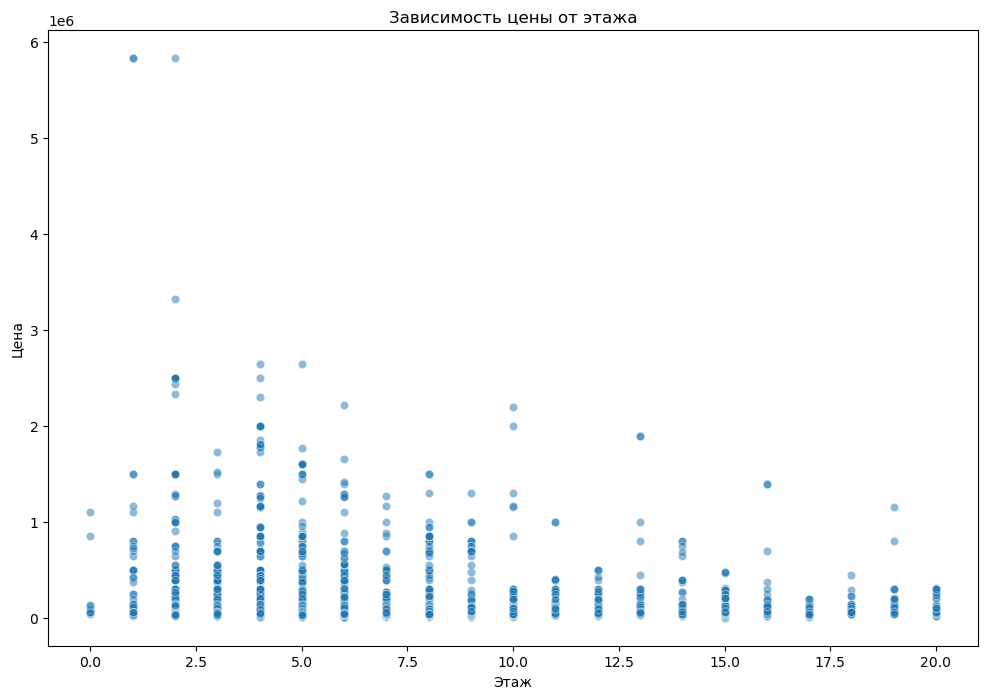

In [543]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Storey', y='Price', data=df_copy, alpha=0.5)

plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.title('Зависимость цены от этажа')
plt.show()

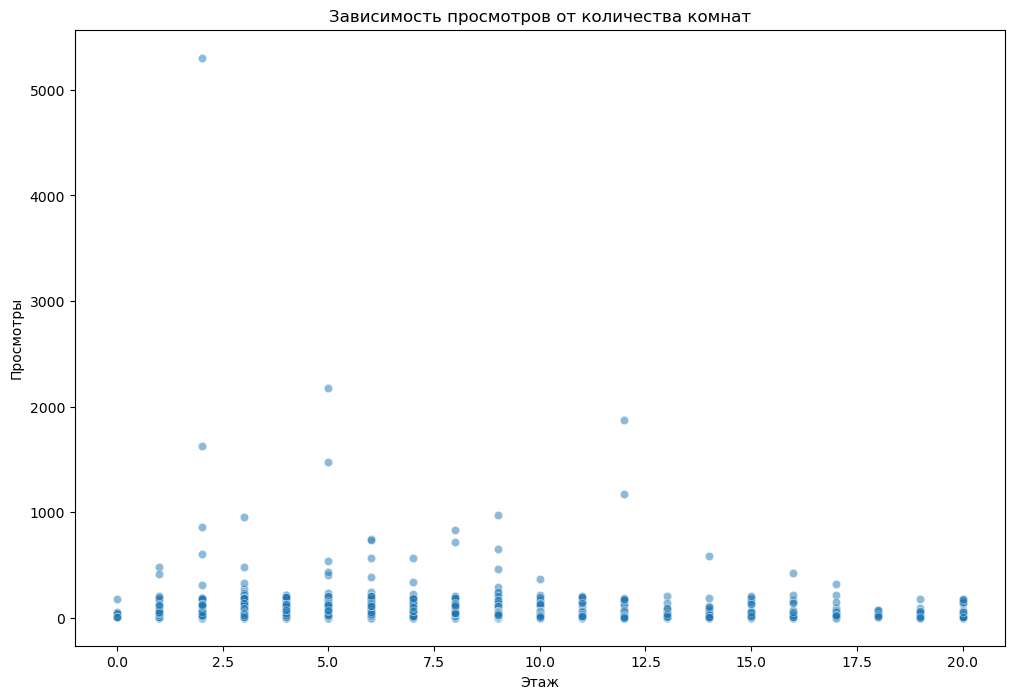

In [544]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Storey', y='Views', data=df_copy, alpha=0.5)

plt.xlabel('Этаж')
plt.ylabel('Просмотры')
plt.title('Зависимость просмотров от количества комнат')
plt.show()

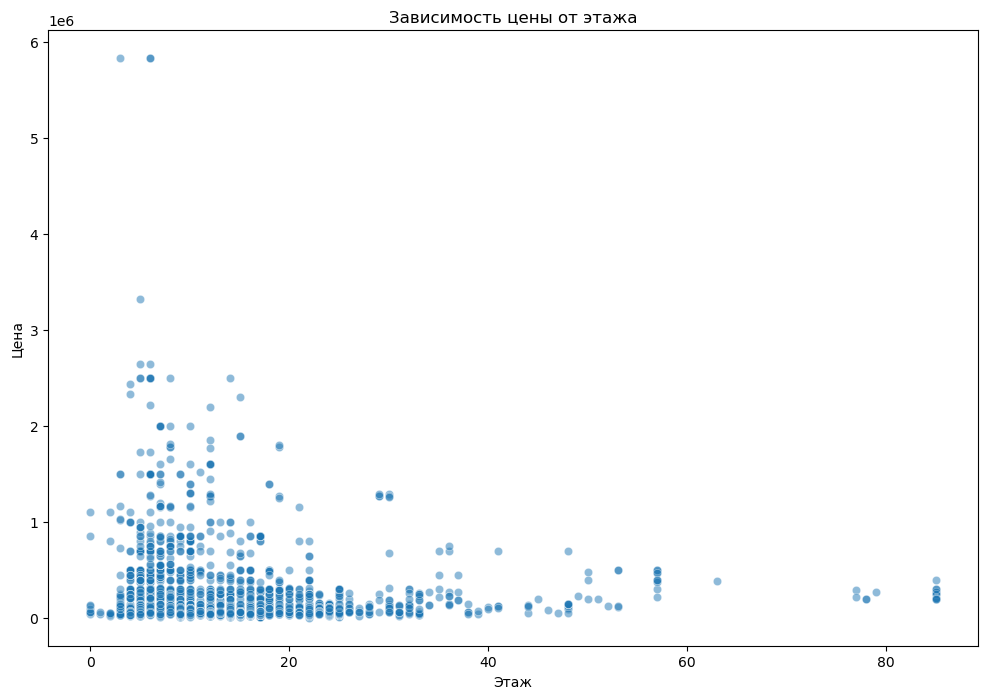

In [545]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Storeys', y='Price', data=df_copy, alpha=0.5)

plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.title('Зависимость цены от этажа')
plt.show()

In [546]:
# 3. Корреляционный анализ и множественная регрессия
X = df[['Storey', 'Storeys']]  # Предикторы
y = df['Price']          # Целевая переменная
X = sm.add_constant(X)        # Добавление константы к X
model = sm.OLS(y, X).fit()    # Построение модели

In [547]:
# Вывод результатов регрессии
print("\nРезультаты линейной регрессии:")
print(model.summary())


Результаты линейной регрессии:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.223
Date:                Wed, 20 Dec 2023   Prob (F-statistic):             0.0400
Time:                        04:31:55   Log-Likelihood:                -58828.
No. Observations:                4160   AIC:                         1.177e+05
Df Residuals:                    4157   BIC:                         1.177e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.801e+0

In [548]:
#Коэффициенты:
#Константа: Значение константы составляет около 121,900, что представляет собой оценочную начальную цену аренды, если не учитывать этаж и общее количество этажей в доме.
#Storey (Этаж): Коэффициент для 'Storey' составляет примерно 397.63. Это означает, что с каждым увеличением этажа цена аренды возрастает в среднем на 397.63. Это указывает на положительную связь между этажом квартиры и ценой аренды.
#Storeys (Общее количество этажей): Коэффициент для 'Storeys' составляет приблизительно -4.73, что означает, что с каждым увеличением общего количества этажей в доме цена аренды уменьшается в среднем на 4.73. Это указывает на обратную связь: чем больше этажей в доме, тем ниже цена аренды.
#R-квадрат (R-squared): Значение R-квадрата составляет 0.009, что означает, что модель объясняет всего лишь около 0.9% изменчивости цены аренды. Это говорит о том, что другие факторы, не учтенные в модели, играют значительную роль в определении цены аренды.
#Статистическая значимость: P-значения для коэффициентов 'Storey' и 'Storeys' значительно меньше 0.05, что указывает на их статистическую значимость.
#Общий вывод из этого анализа заключается в том, что, хотя этаж квартиры и общее количество этажей в доме имеют статистически значимое влияние на цену аренды, общая объясняющая способность этих факторов довольно низкая. Это предполагает, что для более точного определения цены аренды необходимо учитывать и другие факторы.

4.10. Комиссия (чем выше, тем хуже)

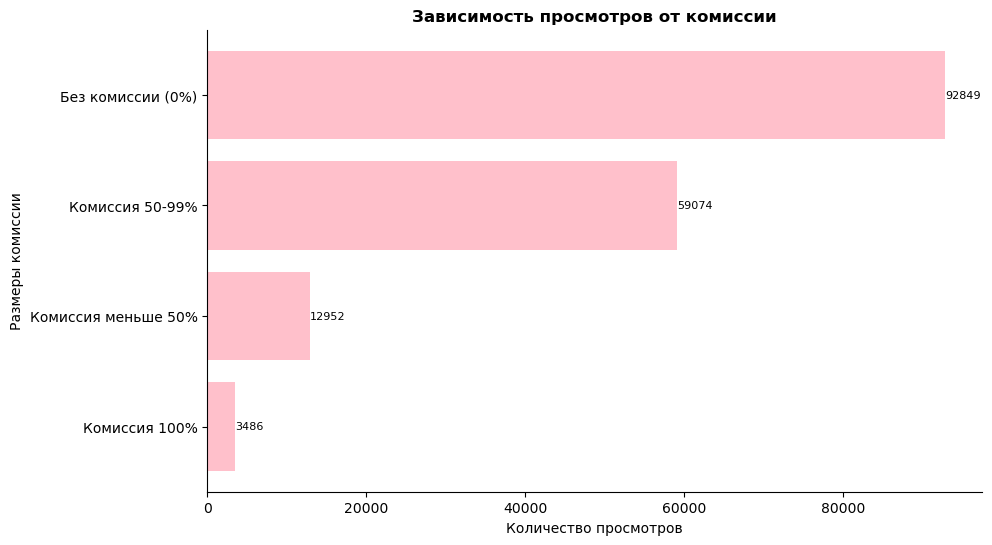

In [549]:
fig, ax = plt.subplots(figsize=(10, 6))
counts = df.groupby('Fee_tipe')['Views'].sum().sort_values(ascending=True)
bars = plt.barh(counts.index, counts.values, color='pink')


plt.bar_label(bars, fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks(counts.index)

ax.set_title('Зависимость просмотров от комиссии', fontdict={'fontsize': 12, 'fontweight': 'bold'})
ax.set_xlabel('Количество просмотров')
ax.set_ylabel('Размеры комиссии')

plt.show()

In [550]:
## Наибольшее количество просмотров у объявлений без комиссии, далее идут объвления с комиссией от 50 до 99%

In [551]:
## Посмотрим, от чего зависит комиссия провайдера

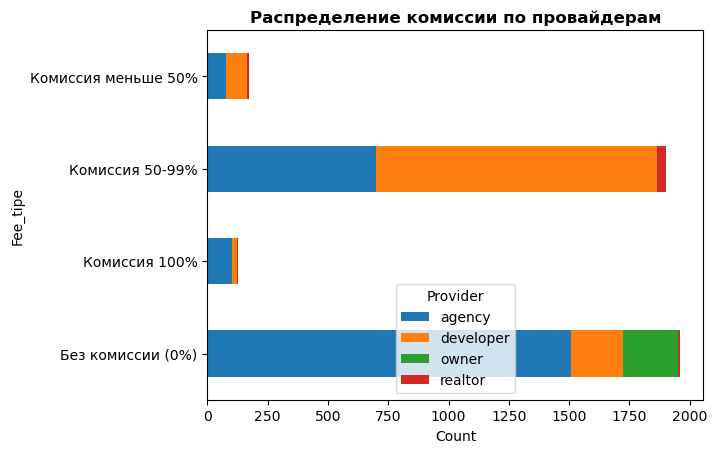

In [552]:
df.groupby('Fee_tipe')['Provider'].value_counts(ascending = True).\
unstack().plot(kind ='barh', stacked = True)

plt.title('Распределение комиссии по провайдерам', fontweight = 'bold')
plt.xlabel('Count')
plt.ylabel('Fee_tipe')

plt.show()

In [553]:
## Как видно по графику, агентства в большинстве работают без комиссии, 
## в то время как застройщики чаще устанавливают комиссию от 50 до 99%

In [554]:
df.pivot_table(index=['Provider'],
              values=['Fee_Percent'],
              aggfunc=['mean', 'median', len])


,mean,median,len
,Fee_Percent,Fee_Percent,Fee_Percent
Provider,,,
agency,20.950105,0,2385
developer,43.838580,50,1493
owner,0.000000,0,225
realtor,41.912281,50,57


In [555]:
## Как видно, агенты чаще работают без комиссии, чем застройщики

In [556]:
## Больше всего просмотров набирают квартиры без комиссии
## Без комиссии чаще всего выставляют агентства, агентства также выкладывают более привлекательные, но дорогие квартиры
## Можно сделать вывод, что агентства выставляют самые привлекательные условия для клиентов

In [557]:
## Узнаем, какими критериями обладают квартиры, которые набирают более 100 просмотров

In [561]:
df.pivot_table(index=['Views_type'],
              values=['Price', 'Fee_Percent', 'Minutes', 'Rooms', 'Storey', 'Storeys', 'Total_Area'],
              aggfunc=['median', len])

median                                       \
                     Fee_Percent Minutes   Price Rooms Storey Storeys   
Views_type                                                              
23-40 просмотров              50       9   65000     2      6      14   
41-200 просмотров              0       7  200000     3      6      12   
Более 200 просмотров           0       7   60000     2      7      12   
Менее 22 просмотров           50       9   60000     2      6      14   

                                        len                             \
                     Total_Area Fee_Percent Minutes Price Rooms Storey   
Views_type                                                               
23-40 просмотров             64        1138    1138  1138  1138   1138   
41-200 просмотров            64         868     868   868   868    868   
Более 200 просмотров         64          69      69    69    69     69   
Менее 22 просмотров          60        2085    2085  2085  2085   2085   

                                         
                     Storeys Total_Area  
Views_type                               
23-40 просмотров        1138       1138  
41-200 просмотров        868        868  
Более 200 просмотров      69         69  
Менее 22 просмотров     2085       2085

In [562]:
## Квартиры с большим количеством просмотром обычно без комиссии и сдаются агентством,
## в среднем они площадью 64 кв м, в них 3 комнаты, это 6 этаж в многоэтажном доме, их стоимость 300 000 рублей, до метро 6 минут
## Меньше просмотров набирают более дешевые квартиры, причем можно предположить, что больше влияет не стоимость, а размер комиссии